# UCI Bank Marketing Dataset - Classification

In [226]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
%matplotlibe inline

# Import data
df = pd.read_csv(r'C:\Users\David\ML\datasets\bank-additional\bank-additional\bank-additional-full.csv', sep =';')

UsageError: Line magic function `%matplotlibe` not found.


## I. First impression of the dataset

In [2]:
df = pd.DataFrame(df)
# Feature 'duration' should not be used according to dataset description
df = df.drop('duration', axis=1) 
# Look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


In [3]:
# Look at the values and distributions - numerical
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# Looking at the categorical features
cat_df = df.select_dtypes(include='object')
for name in cat_df:
    cat_numbers = cat_df[name].value_counts().count()
    cat_values = cat_df[name].unique()
    print(name, cat_numbers)
    print(name, cat_values, '\n')

job 12
job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital 4
marital ['married' 'single' 'divorced' 'unknown'] 

education 8
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default 3
default ['no' 'unknown' 'yes'] 

housing 3
housing ['no' 'yes' 'unknown'] 

loan 3
loan ['no' 'yes' 'unknown'] 

contact 2
contact ['telephone' 'cellular'] 

month 10
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week 5
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome 3
poutcome ['nonexistent' 'failure' 'success'] 

y 2
y ['no' 'yes'] 



## II. Univariate analysis of the dataset

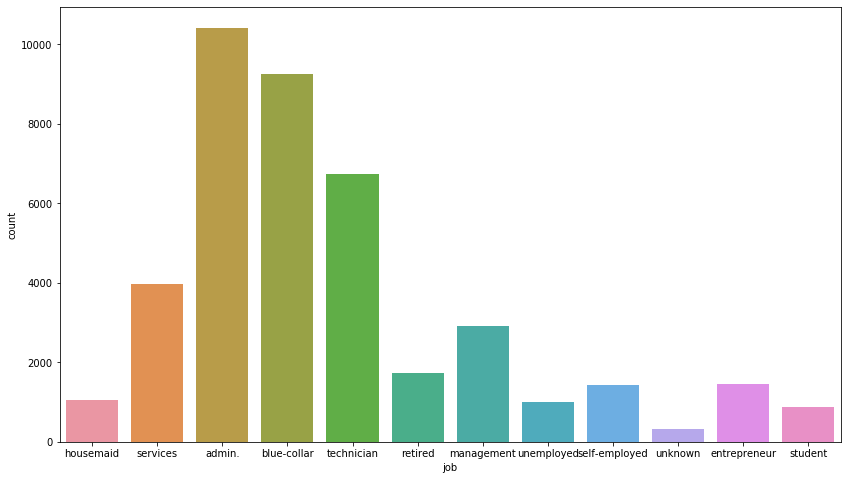

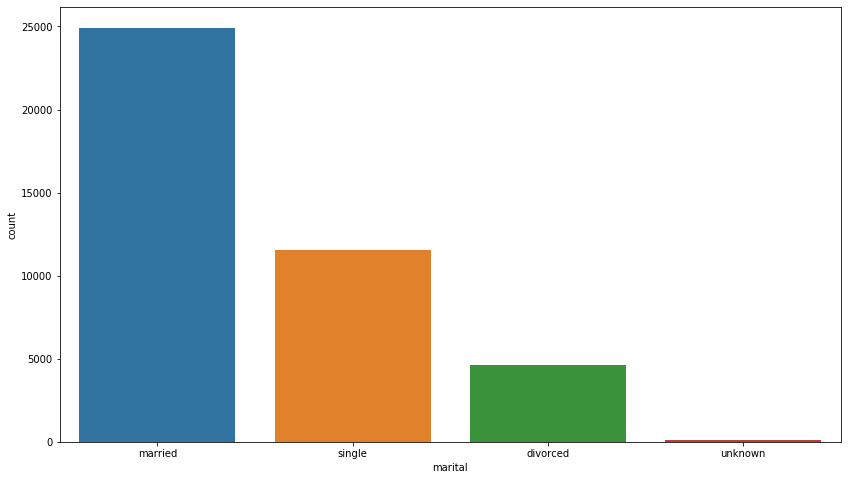

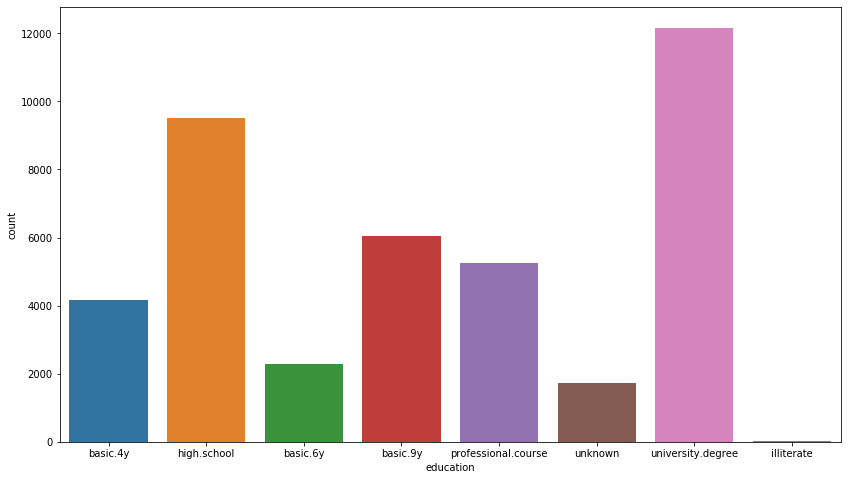

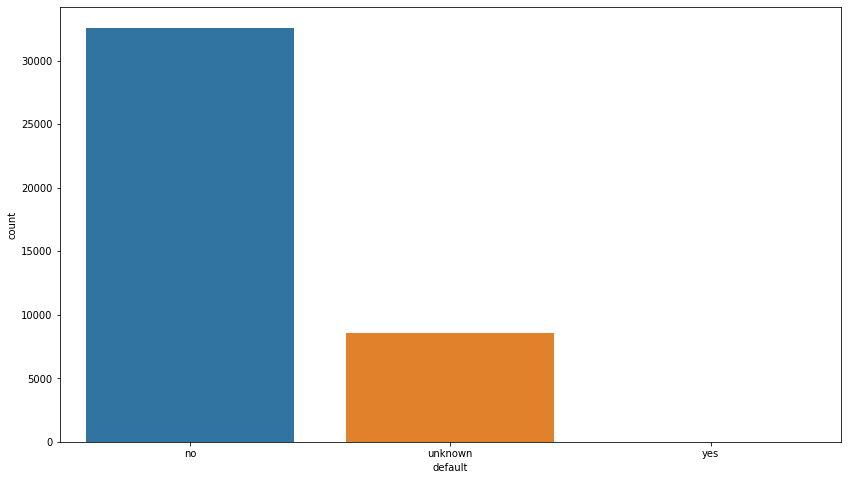

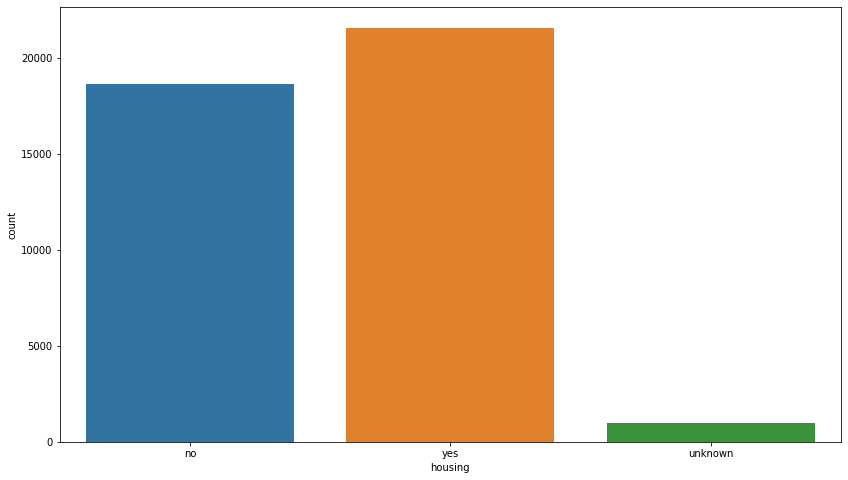

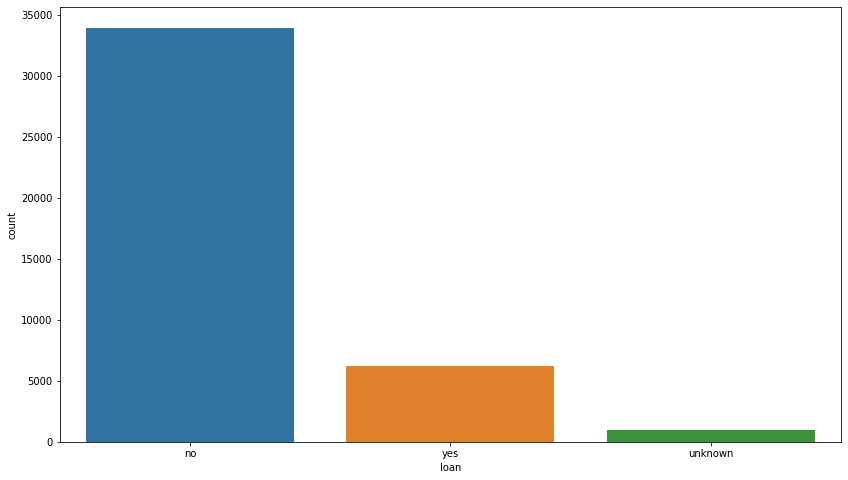

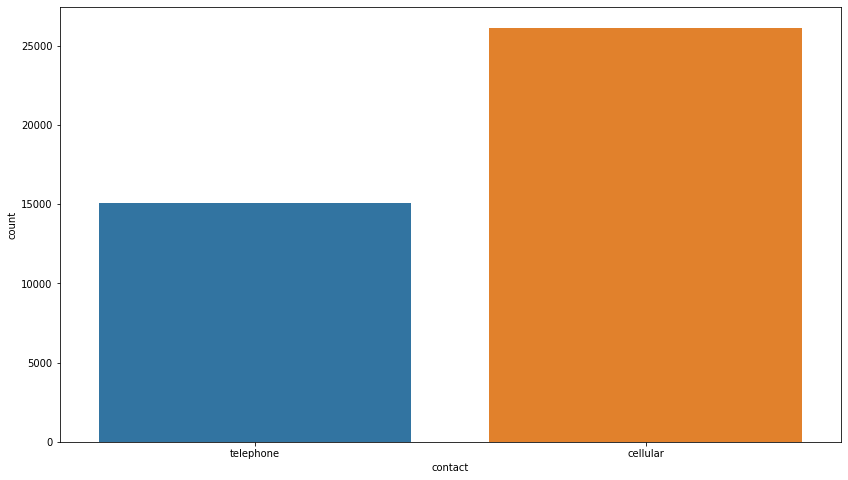

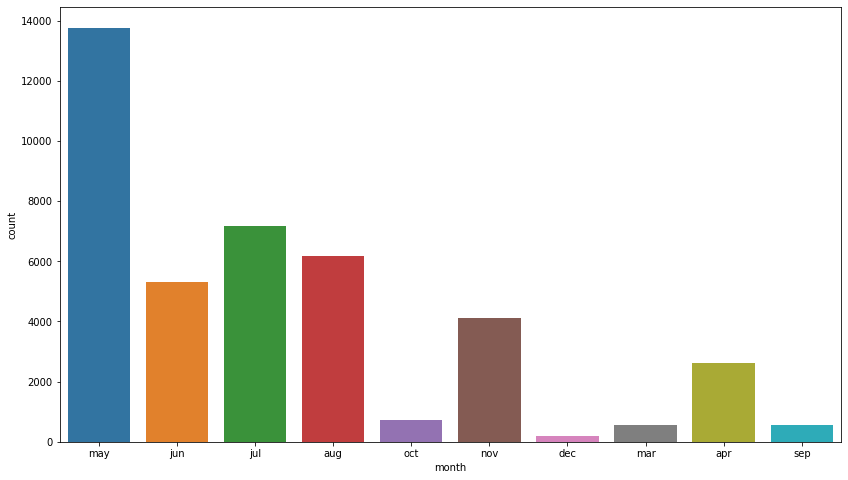

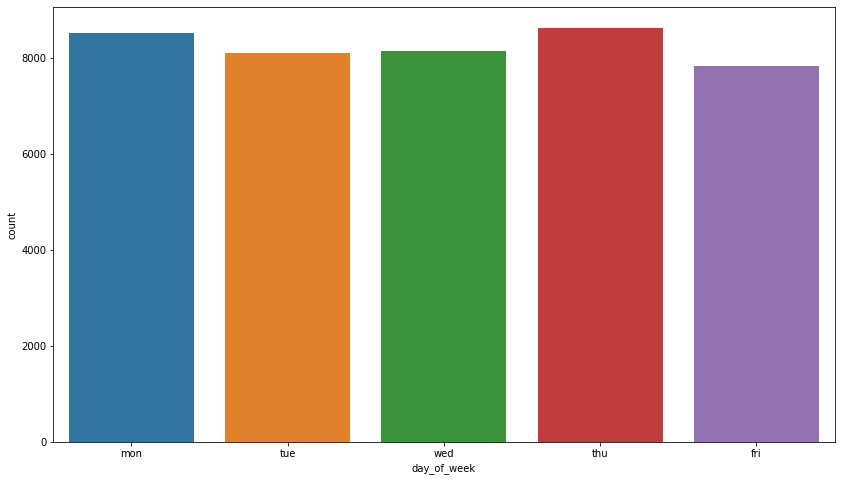

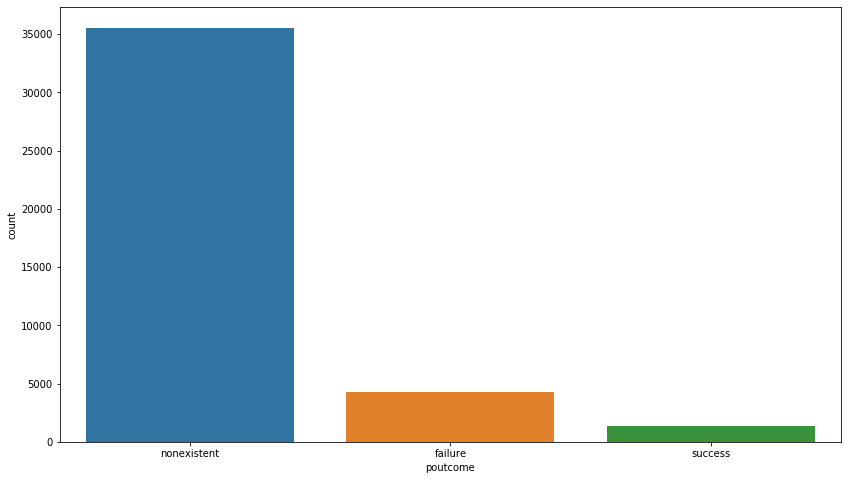

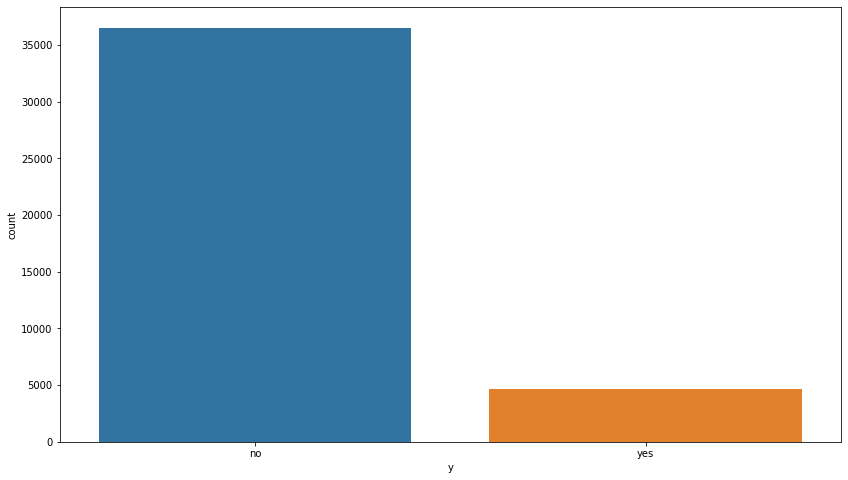

In [5]:
# Looking at the value counts of the categorical features
import seaborn as sns

for column in df.select_dtypes(include='object'):
    plt.figure(figsize=(14,8))
    sns.countplot(x=df[column], data=df)

The feature "Default" has a very odd value distribution. Almost all of the "yes" values seem to hide in the "unknown" value type. It is better to drop this feature later on as part of the Feature Engineering.

In [6]:
# Looking at the specific number of "yes" values of the feature "Default"
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABC41F5CC0>,
      dtype=object)

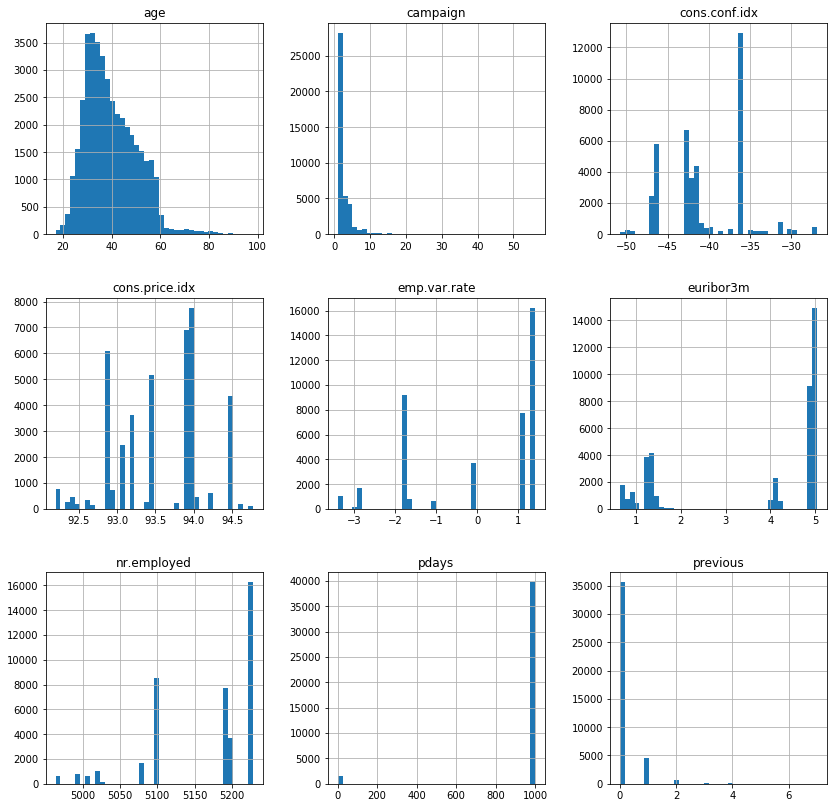

In [7]:
# Looking at the distributions of numerical features
df.hist(bins = 40, figsize = (14,14))

We have a skewed dataset as the label "y" is highly skewed towards 0 - F1 score as classification metric seems plausible and will be used later on for the overall evaluation of the models.

In [8]:
# Looking at the specific number of "yes" values of the feature "y"
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The feature "pdays" has a lot of values of 999 -> client not previously contacted. A new column could be helpful that is 1 for someone who has not been contacted yet and 0 otherwise. This new column will be added as part of the Feature Engineering.

In [9]:
# Looking at the specific number of values of the feature "pdays"
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [10]:
# The feature "campaign" is highly concentrate around low values. I'd like to have a closer look at the specific values
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

## III. Bivariate analysis of the dataset

In [11]:
# Replacing y (Yes/No) with 1 and 0 to better analyze the dataset
df['y'].replace(to_replace = 'yes', value = 1, inplace = True)
df['y'].replace(to_replace = 'no', value = 0, inplace = True)

y                 1.000000
nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
cons.price.idx    0.136211
campaign          0.066357
cons.conf.idx     0.054878
age               0.030399
Name: y, dtype: float64


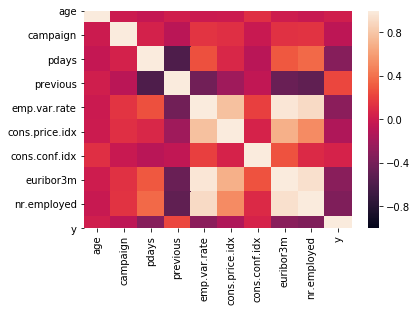

In [12]:
# Pearsons's correlations of the dataset - numerical
correlation_matrix = df.corr()
print(np.abs(correlation_matrix['y']).sort_values(ascending=False))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1)

Various features are highly correlated (economic variables). As I do not plan to use Linear Regression the multicolinearity is tolerated here, because of the additional information the features may provide to the models. A more intese look on the impact of the numerical features on the label may give more inside.

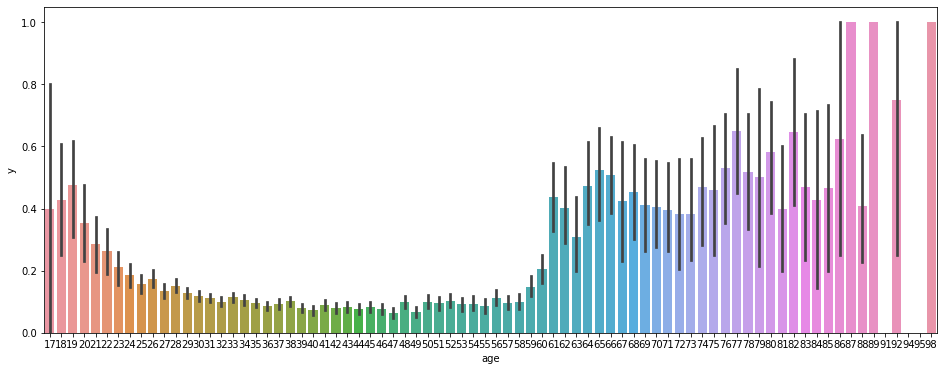

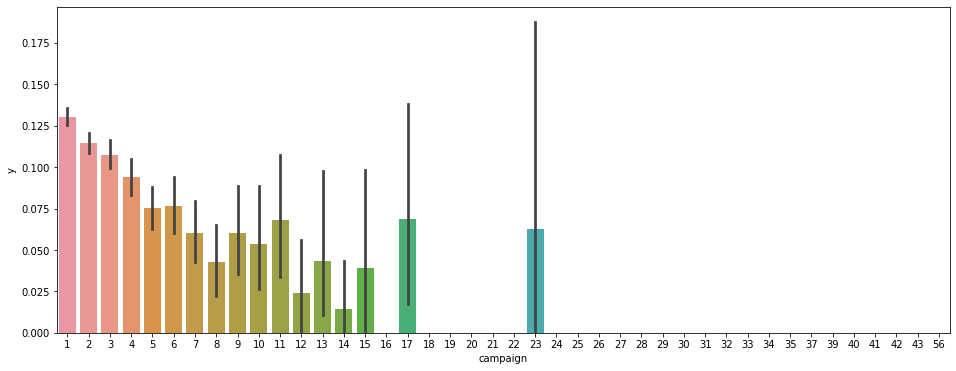

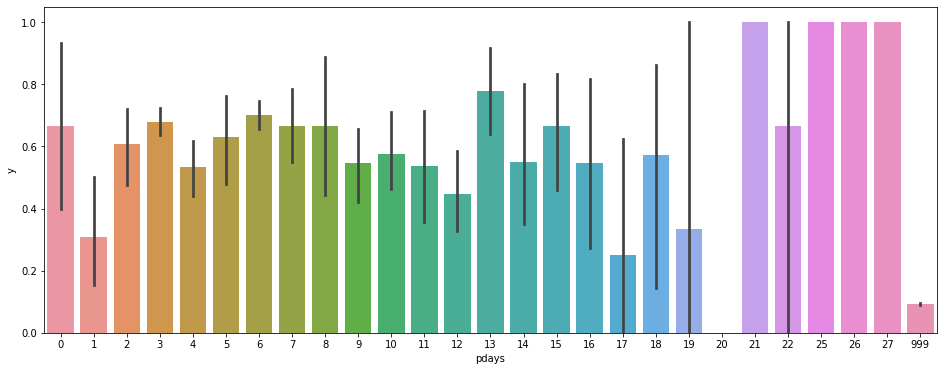

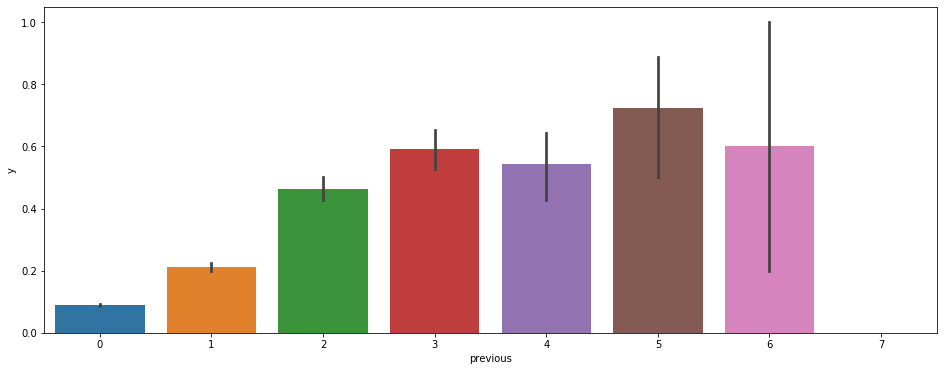

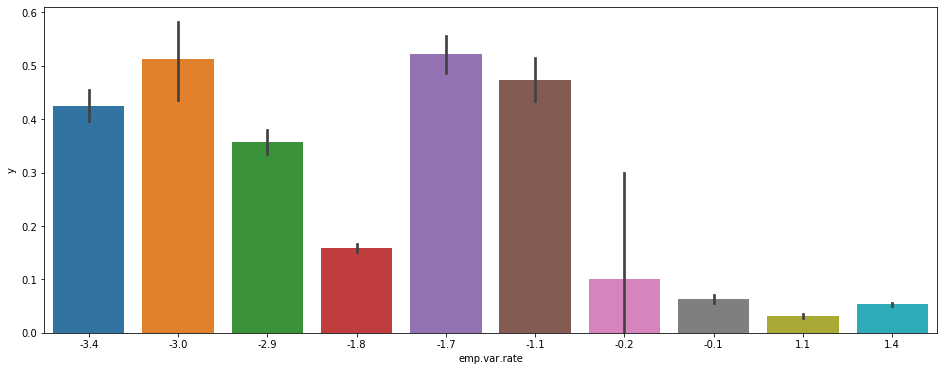

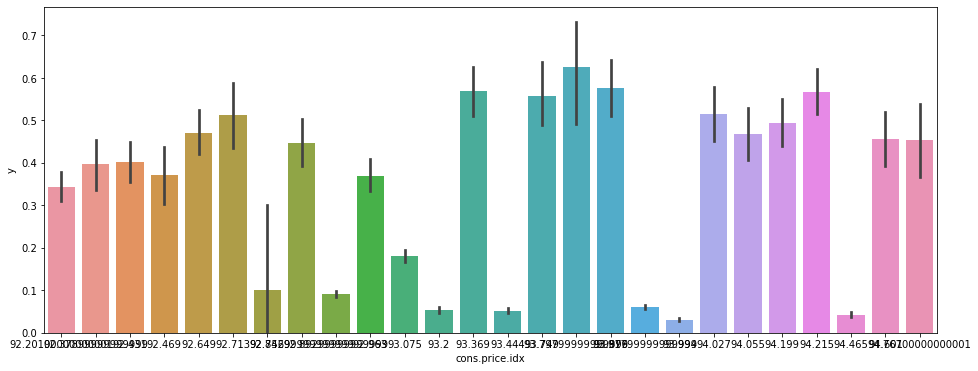

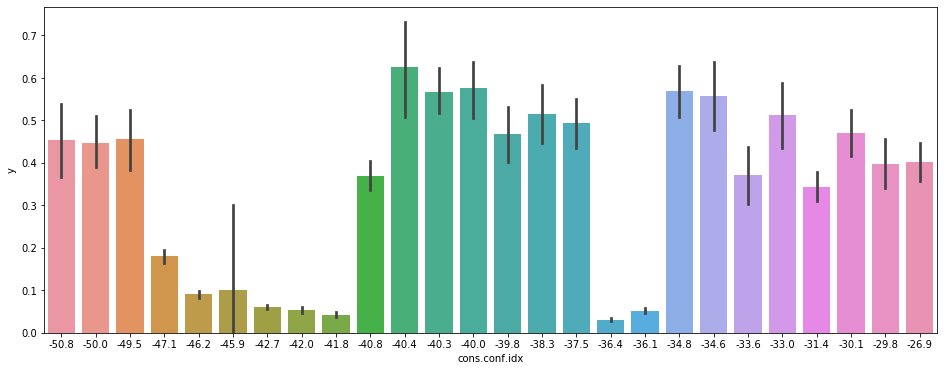

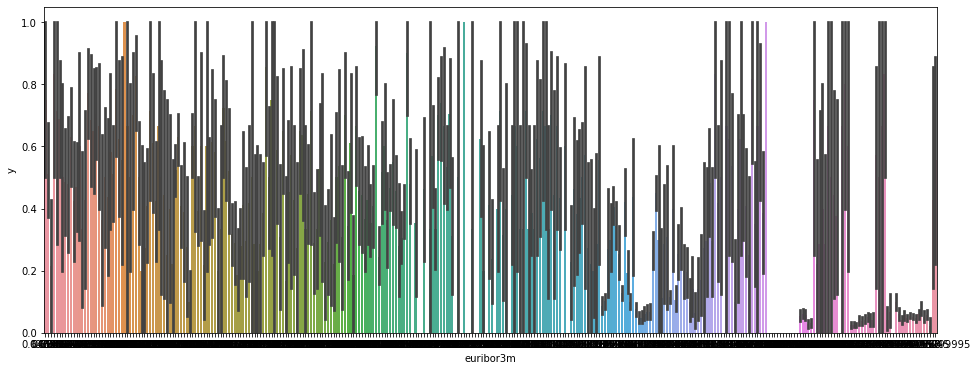

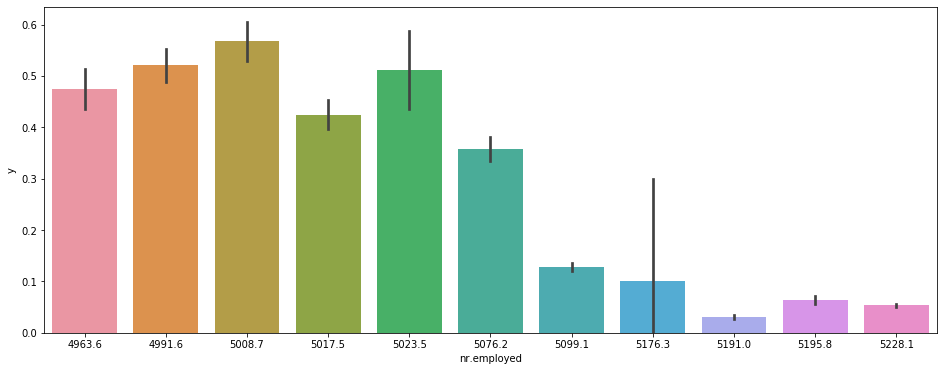

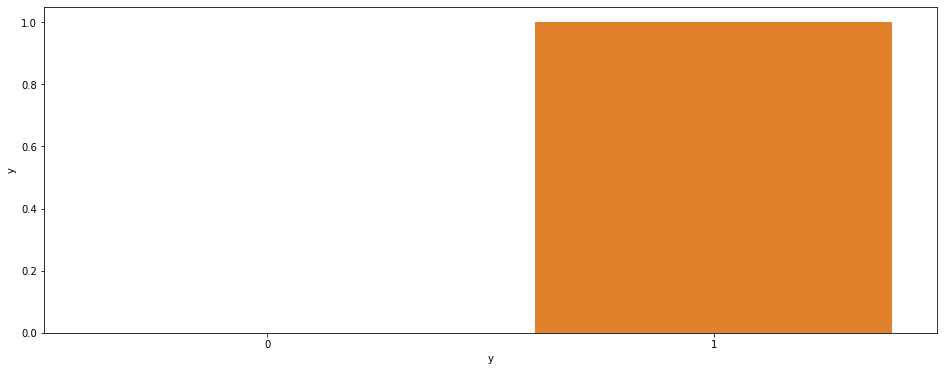

In [13]:
# Barplots for numerical features
df_num = df.select_dtypes(include=['int64', 'float64'])
for column in df_num:
    plt.figure(figsize=(16,6))
    sns.barplot(x = df_num[column], y = 'y',data = df_num)

The feature "emp.var.rate" and "nr.employed" have similar meanings as they both show a tendency towards a higher
 success rate when there are less employees ("nr.employed") and a reduction in general workforce ("emp.var.rate"). To combine these effects the two features will be multiplied with each other and reduced to one feature (after being scaled). This will be implemented during Feature Engineering.

The "age" feature should be binned into multiple bins according to the y-relationship, which shows cut-points of discontinuity regarding to following example numpy code: np.arange(0, df['age'].max(), 20). Using binning there is no necessity for outlier detection regarding this feature. This will be implemented during Feature Engineering.

As a next step I would like to have a look at the categorical features.

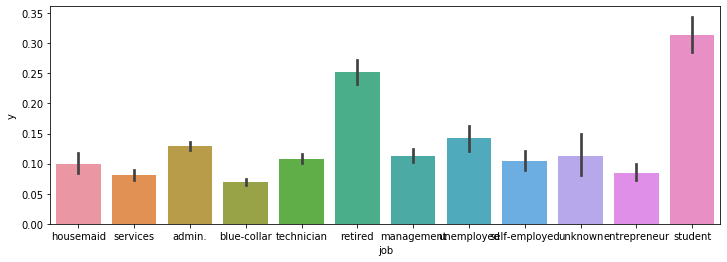

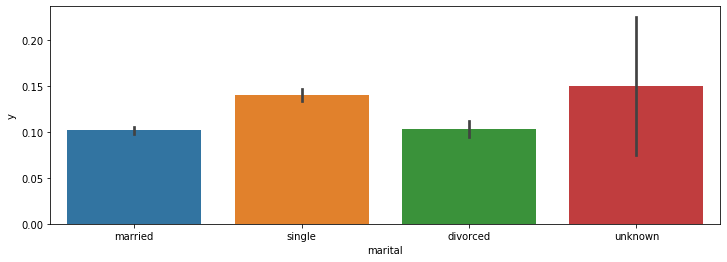

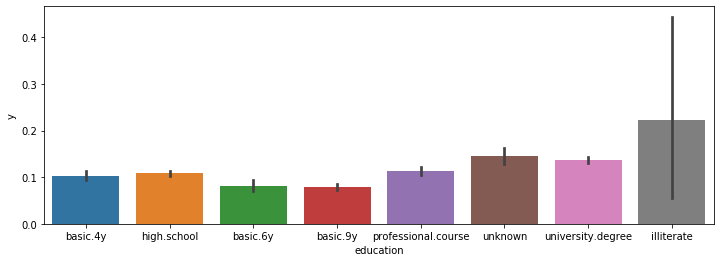

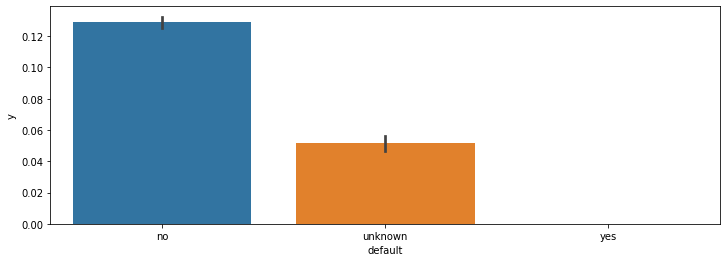

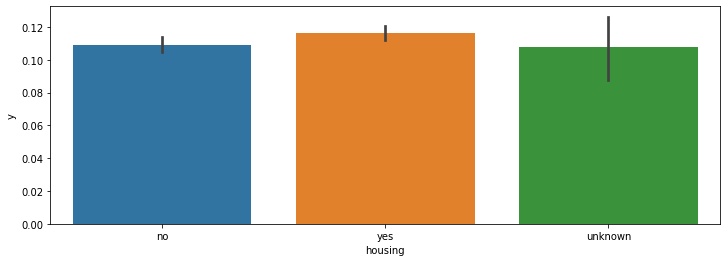

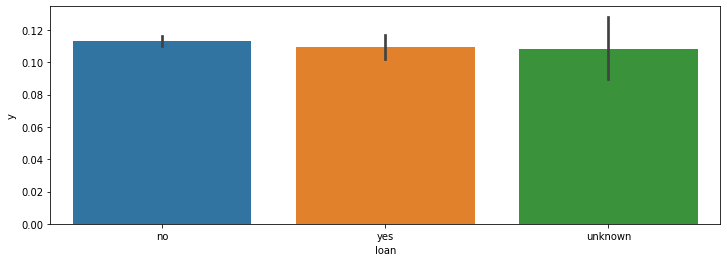

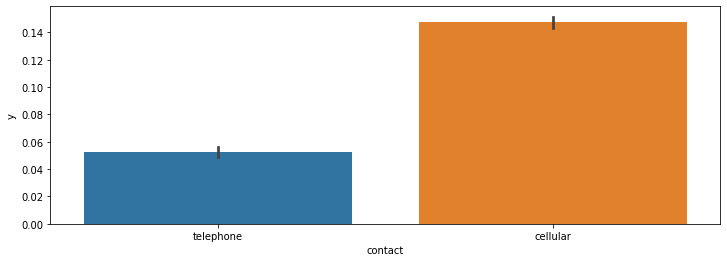

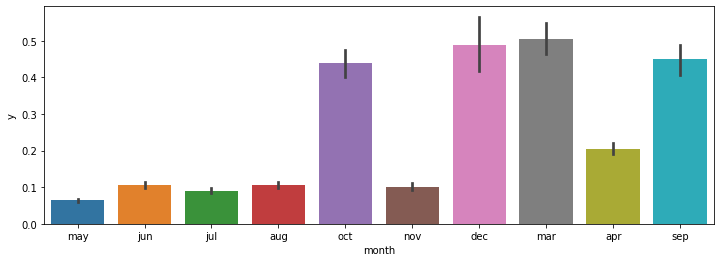

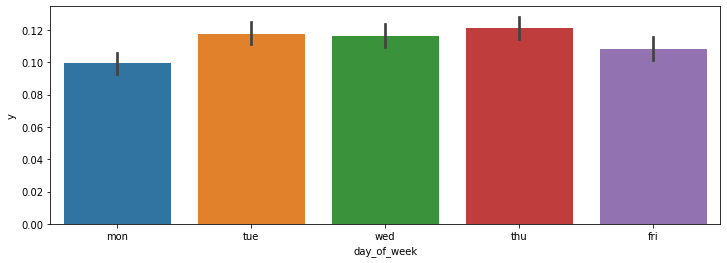

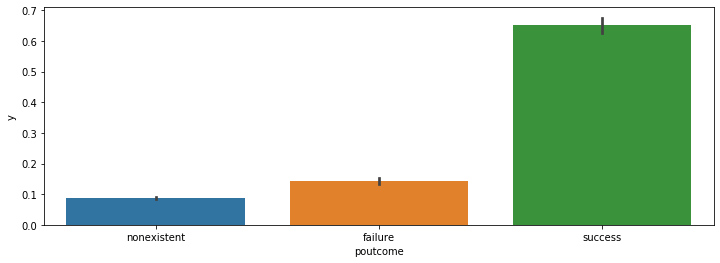

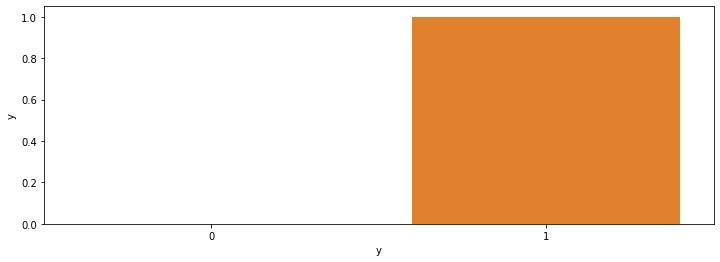

In [14]:
# Barplots for categorical features
df_cat = df.select_dtypes(include='object')
df_cat = pd.concat([df_cat, df['y']], axis = 1)
for column in df_cat:
    plt.figure(figsize=(12,4))
    sns.barplot(x = df_cat[column], y = 'y',data = df_cat)

Between the different plots of categorical features we can already see some interesting relations between features like "poutcome" and "contact" for example and the y-label, as the mean values of the different categories of the individual feature already differ quite strongly. For  the features "loan" and "housing" those mean values seem not to differ a lot, so it will be interesting how these features behave during the correlation analysis for categorical features. This analysis will be performed by using the chi-squared test and the mutual information, both implemented via sklearn.

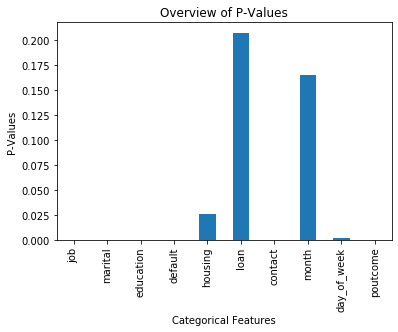

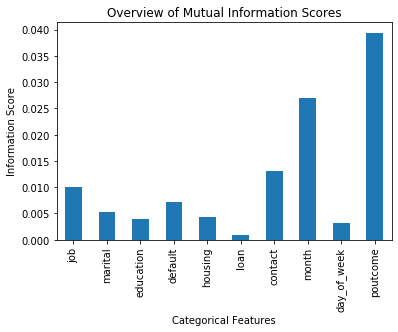

In [210]:
# To look at the correlations of the categorical features to the label y the chi-squared test and the mutual information is used 
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder

# For the sklearn implementation we have to encode the categorical features
X = df_cat.drop(columns=['y'], axis=1)
y = df_cat['y']
encoder = OrdinalEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X))

# Performing the chi-squared test and mutual information between one categorical feature and the label y
chi_scores = chi2(X_encoded,y)
information = mutual_info_classif(X_encoded, y)

# Printing the p-values in a bar-chart for visualization
p_values = pd.Series(chi_scores[1], index = X.columns)
plt.figure()
plt.title('Overview of P-Values')
plt.xlabel('Categorical Features')
plt.ylabel('P-Values')
p_values.plot.bar()

# Printing the information scores in a bar-chart for visualization
information_s = pd.Series(information, index = X.columns)
plt.figure()
plt.title('Overview of Mutual Information Scores')
plt.xlabel('Categorical Features')
plt.ylabel('Information Score')
information_s.plot.bar()

Regarding the P-Values except for "housing", "loan", "month" and "day_of_week" all the values are very low, so that they are not displayed in the visualization. Especially "loan" and "month" have in comparison quite a high P-Value, which is above the chosen threshold of 0.05. 

When looking at the mutual information scores we see a similar picture. Especially "loan" has quite a low score, while "month" contradicts the evaluation of the P-Value. Having those to different information bases and looking at the number of features in general I decide not to drop any feature due to independence to the y-label. But depending on the results of the tree based algorithms later on and the respective feature importances a new model without some features could be interesting.

##  IV. Detect abnormal and missing values
"Unknown"-values are the NaN values in this dataset according to the dataset description.

In [15]:
# Estimating the amount of data cleaning
for column in df:
    a = (df[column] == 'unknown').value_counts()
    print(column,'\n' , a, '\n')

age 
 False    41188
Name: age, dtype: int64 

job 
 False    40858
True       330
Name: job, dtype: int64 

marital 
 False    41108
True        80
Name: marital, dtype: int64 

education 
 False    39457
True      1731
Name: education, dtype: int64 

default 
 False    32591
True      8597
Name: default, dtype: int64 

housing 
 False    40198
True       990
Name: housing, dtype: int64 

loan 
 False    40198
True       990
Name: loan, dtype: int64 

contact 
 False    41188
Name: contact, dtype: int64 

month 
 False    41188
Name: month, dtype: int64 

day_of_week 
 False    41188
Name: day_of_week, dtype: int64 

campaign 
 False    41188
Name: campaign, dtype: int64 

pdays 
 False    41188
Name: pdays, dtype: int64 

previous 
 False    41188
Name: previous, dtype: int64 

poutcome 
 False    41188
Name: poutcome, dtype: int64 

emp.var.rate 
 False    41188
Name: emp.var.rate, dtype: int64 

cons.price.idx 
 False    41188
Name: cons.price.idx, dtype: int64 

cons.conf.idx 
 Fa

c:\users\david\ml\venv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


As said before the feature "Default" will be dropped as a feature due to missing information (three y 'yes'-values)
All other "unknown" instances will be dropped and it will be analyzed how much data points would be lost. The implementation will be done as part of Feature Engineering.

As the next step I will look at the potential outlier values of the numerical features.

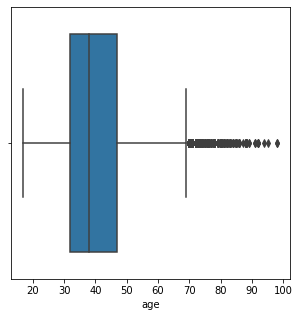

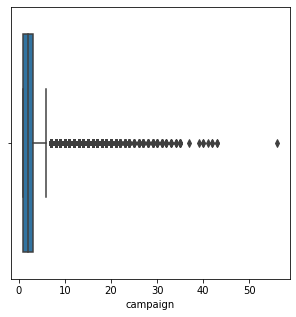

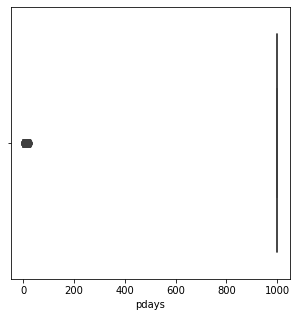

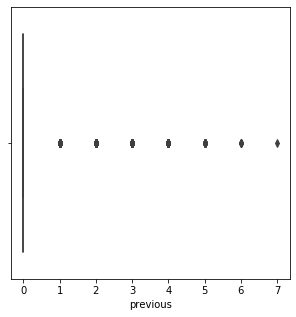

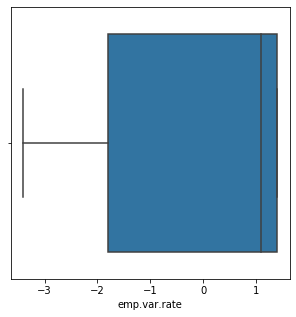

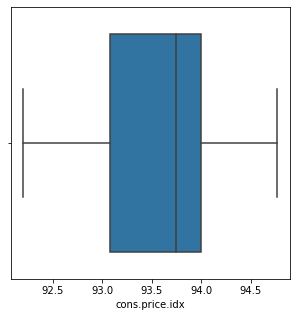

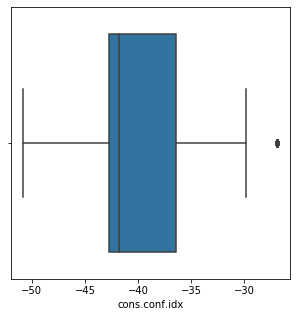

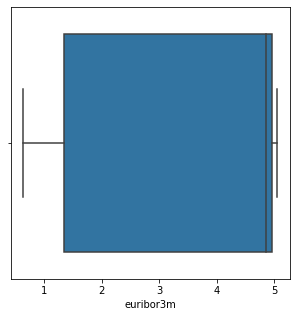

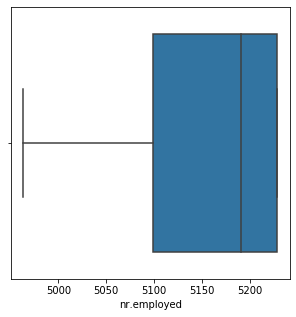

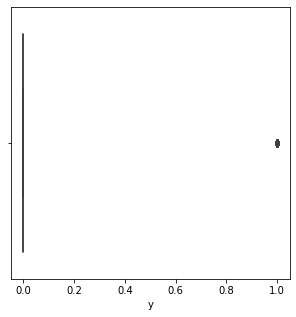

In [16]:
# Plotting the boxplots for the numerical features
for column in df_num:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_num[column])

The most interesting boxplot is the one about the feature "campaign", when comparing it to the respective histogram. Due to the limited amount of instances in the dataset it needs to be evaluated how many instances would be lost if the outlier instances according to the IQR-Method (Various thresholds 1.5, 2, 2.5) would be dropped.

In [17]:
# IQR of the feature "campaign"
Q1 = df['campaign'].quantile(.25)
Q3 = df['campaign'].quantile(.75)
IQR = Q3 - Q1
print('IQR is:', IQR)
print('Q1 is:', Q1)
print('Q3 is:', Q3)

# Find the number of lost instances per threshold
lost_instances_15 = (df['campaign'] > (Q3 + 1.5*IQR)).sum()
lost_instances_20 = (df['campaign'] > (Q3 + 2*IQR)).sum()
lost_instances_25 = (df['campaign'] > (Q3 + 2.5*IQR)).sum()
print('Lost instances with IQR(1.5)', lost_instances_15)
print('Lost instances with IQR(2.0)', lost_instances_20)
print('Lost instances with IQR(2.5)', lost_instances_25)

IQR is: 2.0
Q1 is: 1.0
Q3 is: 3.0
Lost instances with IQR(1.5) 2406
Lost instances with IQR(2.0) 1777
Lost instances with IQR(2.5) 1377


There would be too many instances lost due to the tagged outliers - A look at value_counts should clarify the feature distribution.

In [18]:
# Value count of the feature "campaign" 
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

# V. Feature Engineering
Converting all the knowledge I received from the Exploratory Data Analysis (EDA) into dataset transformations.

In [19]:
# Remove the feature "Default"
df = df.drop(columns = ['default'], axis = 1)

As there is currently no good implementation of any MICE/Algorithm Encoder for categorical features in Python the drop of the rows is preferred (research shows that dropping the features leads often to better results given a big enough dataset).


In [20]:
# Removing rows with unknown values
for column in df:
    df = df[df[column] != 'unknown']
df.info()
df.reset_index(inplace = True)
df = df.drop(columns = ['index'], axis = 1)

c:\users\david\ml\venv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 19 columns):
age               38245 non-null int64
job               38245 non-null object
marital           38245 non-null object
education         38245 non-null object
housing           38245 non-null object
loan              38245 non-null object
contact           38245 non-null object
month             38245 non-null object
day_of_week       38245 non-null object
campaign          38245 non-null int64
pdays             38245 non-null int64
previous          38245 non-null int64
poutcome          38245 non-null object
emp.var.rate      38245 non-null float64
cons.price.idx    38245 non-null float64
cons.conf.idx     38245 non-null float64
euribor3m         38245 non-null float64
nr.employed       38245 non-null float64
y                 38245 non-null int64
dtypes: float64(5), int64(5), object(9)
memory usage: 5.8+ MB


Only 7% of the values were lost due to NaN values. This looks like a good deal given the fact, that all the NaN values are part of categorical features.

In [21]:
# Binning of the "age" feature - np.arange(0, max, 20)
bins = [0, 20, 40, 60, 80, 100]
labels = ['a', 'b', 'c', 'd', 'e']
df['age'] = pd.cut(x = df['age'], labels= labels, bins = bins)

As the y-relationship of "age" is not increasing linearly, it is not an ordinal categorical feature, so OneHotEncoding is necessary depending on the algorithm.

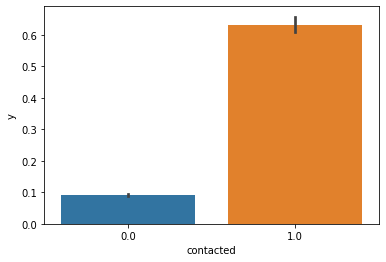

In [22]:
# Adding the new feature "contacted" to symbolize if the client was previously contacted = 1
df.loc[df['pdays'] == 999, 'contacted'] = 0
df.loc[df['pdays'] != 999, 'contacted'] = 1
sns.barplot(x='contacted', y = 'y', data = df)

 0.711112    15100
 1.144976     8062
 0.213326     7105
-0.046163     3517
 2.421772     1497
 4.647105      970
 2.789762      701
 2.145643      572
 2.659712      560
 3.948784      151
-0.022321       10
Name: employment, dtype: int64


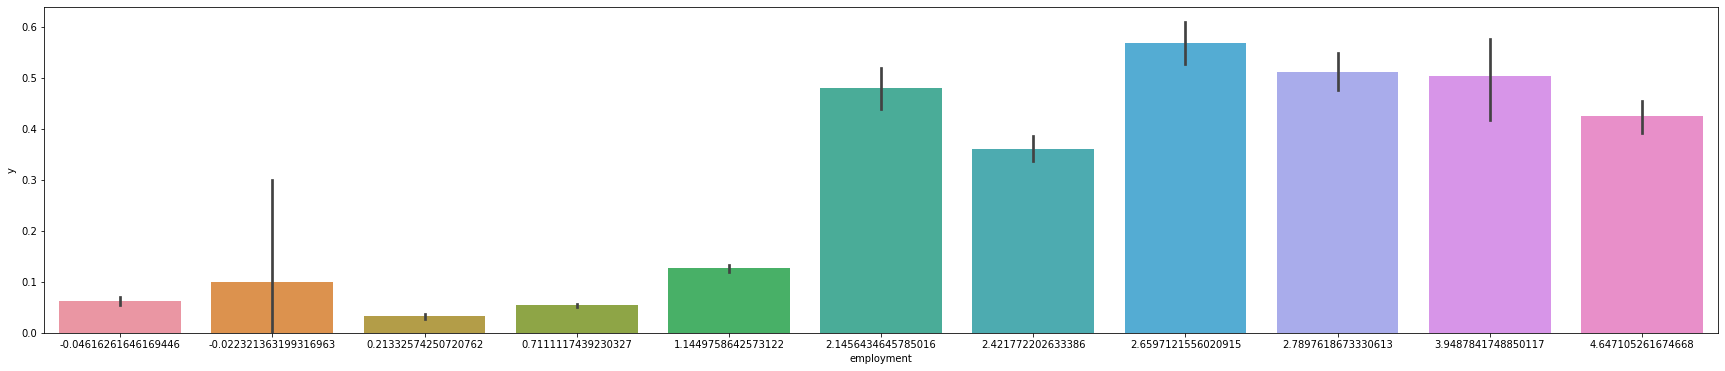

In [23]:
# Combining "emp.var.rate" and "nr.employed" into one feature "employment"
from sklearn.preprocessing import scale
df['emp.var.rate'] = scale(df['emp.var.rate'])
df['nr.employed'] = scale(df['nr.employed'])
df['employment'] = df['nr.employed'] * df['emp.var.rate']
df = df.drop(columns=['emp.var.rate', 'nr.employed'], axis = 1)

# Show the new y-relationship of "employment"
plt.figure(figsize=(30,6))
sns.barplot(x='employment', y = 'y', data = df)
print(df['employment'].value_counts())

In [24]:
# Final dataset for data preparation
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,employment
0,c,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,0.0,0.213326
1,c,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,0.0,0.213326
2,b,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,0.0,0.213326
3,b,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,0.0,0.213326
4,c,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,0.0,0.213326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,d,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,1,0.0,2.145643
38241,c,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,0,0.0,2.145643
38242,c,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,0,nonexistent,94.767,-50.8,1.028,0,0.0,2.145643
38243,c,technician,married,professional.course,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,1,0.0,2.145643


# VI. Data preparation pipelines for tree based algorithms
Due to tree based algorithms the numerical features will not be preprocessed. Due to the same reason the nominal categorical features will not be OneHotEncoded but uses OrdinalEncoding like the ordinal categorical features.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Pipeline for ordinal categorical features
cat_pipeline_o = Pipeline([
    ('OrdinalEncoder', OrdinalEncoder(categories=[['c','b','a','d','e'],['blue-collar', 'services', 'entrepreneur', 'technician',
                                  'self-employed', 'management', 'housemaid', 'admin.', 'unemployed','retired','student'], ['basic.9y', 'basic.6y', 'high.school', 'professional.course', 'basic.4y', 'university.degree', 'illiterate']])),
])

# Pipeline for nominal categorical features
cat_pipeline_n = Pipeline([
    ('OrdinalEncoderNominal', OrdinalEncoder()),
])

# Definition of the respective columns
cat_o = ['age', 'job', 'education']
cat_n = ['marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num = ['campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'contacted', 'employment']

# Creating the final preparation pipeline for RandomForest
prep_pipeline = ColumnTransformer([
    ('cat_o', cat_pipeline_o, cat_o),
    ('cat_n', cat_pipeline_n, cat_n),    
    ], remainder = 'passthrough')

In [35]:
# Separating train and test data
df_train, df_test = train_test_split(df, test_size = 0.2)
df_train_label = df_train['y']
df_train_features =  df_train.drop(columns = ['y'], axis = 1)
df_test_label = df_test['y']
df_test_features = df_test.drop(columns = ['y'], axis = 1)
#df_train_features['age'].value_counts()
df_train_prepared = pd.DataFrame(prep_pipeline.fit_transform(df_train_features))

# VII. Building and evaluating tree based algorithms
For the comparison Random Forest Classifier, AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier are used. Afterwards their results regarding cross-validations are plotted and analyzed regarding their results and robustness. Finally the feature importances are compared and potentialy some features are dropped.

In [45]:
# Compare multiple Tree based algorithms via default initialization

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Creating a list of models
models = []
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('XGBoost', xgb.XGBClassifier()))

# Separating train and test data
df_train, df_test = train_test_split(df, test_size = 0.2)
df_train_label = df_train['y']
df_train_features =  df_train.drop(columns = ['y'], axis = 1)
df_test_label = df_test['y']
df_test_features = df_test.drop(columns = ['y'], axis = 1)

# Data preparation
df_train_prepared = pd.DataFrame(prep_pipeline.fit_transform(df_train_features))
df_test_prepared = pd.DataFrame(prep_pipeline.fit_transform(df_test_features))

# Test the models 
results = []
names = []
for name, model in models:
    cv = KFold(n_splits = 5)
    model_result = cross_val_score(model, df_train_prepared, df_train_label, cv = cv, scoring = 'f1')
    results.append(model_result)
    names.append(name)
    print(name,'Mean F1-Score: ', model_result.mean(), 'Std: ', model_result.std())

c:\users\david\ml\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\david\ml\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\david\ml\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\david\ml\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\david\ml\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

RandomForest Mean:  0.35119437468760034 Std:  0.012239285195158678
AdaBoost Mean:  0.3138003362140199 Std:  0.01932644587740644
GradientBoosting Mean:  0.34856063041042146 Std:  0.012263649934831873
XGBoost Mean:  0.38163026902982927 Std:  0.012712847883237656


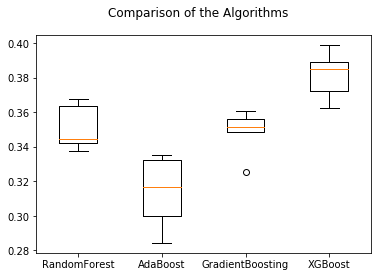

In [46]:
# Comparing the results of the algorithms
fig = plt.figure()
fig.suptitle('Comparison of the Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It is obvious that the XGBoosted Trees perform better than the rest of the models even when considering the 5 Folds. To boost the performance even further in the next step the XGBoost's hyperparameters are tuned too create an even better model.

# VIII. Hyperparameter tuning of the best tree based algorithm
The best tree based algorithm is XGBoost. To tune it I will use xgb.cv and sklearns XGBClassifier GridCV to find the best parameters. The following steps will be performed:
1. Fixate the learning rate and model parameters to find the optimal n_estimators
2. Using the optimal number of n_estimators I will tune max_depth and min_child_weight
3. Afterwards I will tune gamma
4. Then I will tune subsample and colsample
5. Regarding the overfitting problem I will tune the regularization parameters 
6. Finally I will reduce the learning rate regarding all the preliminary found hyperparameters



In [109]:
# Define a function that takes care of training the XGBoost model and evaluating it for the various steps of tuning

# Import libraries for the evaluation
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve, f1_score, accuracy_score

# Define a function for plotting the PRT-Curve
def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label ='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.legend()
    plt.grid()

def xgboost_fit(model, train_features, train_label, test_features, test_label, feature_names, use_CV = True, cv_folds = 5, early_stopping_rounds = 40):
    # feature values: df_features, label values: df_label
    
    # Cross-validation for the optimal number of n_estimators given the initial parameters
    if use_CV:
        xgb_params = model.get_xgb_params()
        xgb_train = xgb.DMatrix(train_features, label = train_label, feature_names=feature_names) 
        cv_result = xgb.cv(xgb_params, xgb_train, num_boost_round = model.get_params()['n_estimators'],
                           nfold = cv_folds, metrics = 'aucpr', early_stopping_rounds = early_stopping_rounds)
        model.set_params(n_estimators=cv_result.shape[0])
        
    # Fit the model to the data - PR/F1 is central metric
    model.fit(train_features, train_label, eval_metric = 'aucpr')
    
    # Predictions based on the training data
    train_predictions = model.predict(train_features)
    train_probabilities = model.predict_proba(train_features)[:,1]
    
    # Predictions based on the test data
    test_predictions = model.predict(test_features)
    test_probabilities = model.predict_proba(test_features)[:,1]
    
    # Print the results
    print('Evaluation report: \n')
    print('ROC AUC score (train):', roc_auc_score(train_label, train_probabilities))
    print('ROC AUC score (test):', roc_auc_score(test_label, test_probabilities))
    print('F1 score (train):', f1_score(train_label, train_predictions))
    print('F1 score (test):', f1_score(test_label, test_predictions))
    print('Accuracy (train):', accuracy_score(train_label, train_predictions))
    print('Accuracy (test):', accuracy_score(test_label, test_predictions))
    print('Classification report - pre optimal F1 threshold: \n', classification_report(test_label, test_predictions))
    
    # Find the precisions, recalls and thresholds
    precisions, recalls, thresholds = precision_recall_curve(test_label, test_probabilities)
    optimal_threshold = thresholds[np.argmax(precisions==recalls)] # For the maximum F1-Score
    
    plot_precision_recall_threshold(precisions, recalls, thresholds)
    plt.show()
    print('The optimal Threshold is:', optimal_threshold)

    # Plot Precision directly against recall
    plt.plot(recalls, precisions, 'b--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.show()
    
    # Computing the optimal binary classification
    test_optimal = (test_probabilities >= optimal_threshold)
    print('ROC AUC with initial threshold (test)', roc_auc_score(test_label, test_probabilities))
    print('ROC AUC with optimal F1 threshold (test)', roc_auc_score(test_label, test_optimal))
    print('F1 score (macro) with optimal F1 threshold (test)', f1_score(test_label, test_optimal))
    print('Classification report - after optimal F1 threshold: \n', classification_report(test_label, test_optimal))
        
    # Plot feature importances
    model.get_booster().feature_names = feature_names
    fi = pd.DataFrame(model.get_booster().get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)
    print(fi)
    plt.figure(figsize =(16,6))
    sns.barplot(x= fi['feature'], y = fi['importance'], data = fi)
    #fi.plot(x = fi['feature'], y = fi['importance'], kind = 'bar', title='Feature Importances')
        #model.get_booster().get_fscore()).sort_values(ascending = False)
   
    
  #  fi.plot(kind='bar', title='Feature Importances')
  #  plt.ylabel('Score')

Evaluation report: 

ROC AUC score (train): 0.8452443118628918
ROC AUC score (test): 0.812073087202353
F1 score (train): 0.43646408839779005
F1 score (test): 0.3926282051282051
Accuracy (train): 0.9133220028761929
Accuracy (test): 0.9009020787030985
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6769
           1       0.67      0.28      0.39       880

    accuracy                           0.90      7649
   macro avg       0.79      0.63      0.67      7649
weighted avg       0.88      0.90      0.88      7649



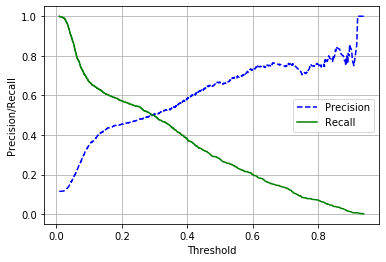

The optimal Threshold is: 0.294111


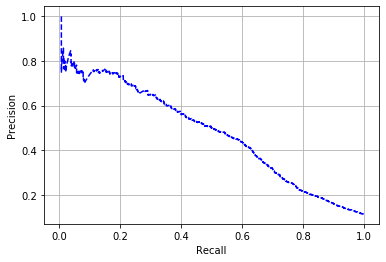

ROC AUC with initial threshold (test) 0.812073087202353
ROC AUC with optimal F1 threshold (test) 0.717498892007682
F1 score (macro) with optimal F1 threshold (test) 0.5
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.50      0.50      0.50       880

    accuracy                           0.88      7649
   macro avg       0.72      0.72      0.72      7649
weighted avg       0.88      0.88      0.88      7649

           feature  importance
0        euribor3m         672
5              job         406
9         campaign         276
3      day_of_week         269
8        education         266
15  cons.price.idx         155
4            month         151
11             age         148
13   cons.conf.idx         143
16         marital         139
6            pdays         137
10         housing         102
1         poutcome          96
7         previo

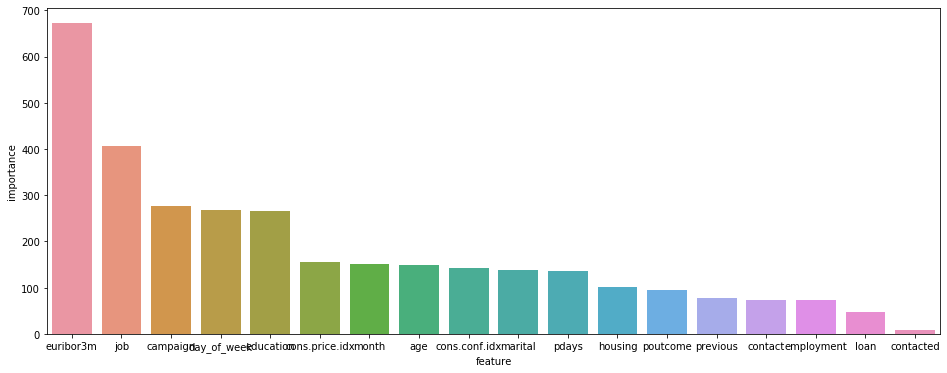

In [110]:
# Step 1: Fixate the learning rate and model parameters to find the optimal n_estimators
from xgboost.sklearn import XGBClassifier

# Join the feature names
feature_names_joined = cat_o + cat_n + num

# Create the first XGBoost model
xgb_1 = XGBClassifier(
learning_rate = 0.1,
n_estimators = 1000,
max_depth = 6,
min_child_weight = 1,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
objective = 'binary:logistic',
scale_pos_weight = 1)

# Call the predefined method
xgboost_fit(xgb_1, df_train_prepared, df_train_label, df_test_prepared, df_test_label, feature_names_joined)

As a first result the F1 score (macro) of 0.5 and (macro avg.) of 0.72 for the test set looks quite promising. Furthermore the feature importances seem to show a tendency, that some of the features are not really important for the model. So from this point of view it could be helpful to get rid of all the features up until "housing". But lets further tune the model and have a look how the importance develops over this process.

In [111]:
# Having a closer look on the best model
xgb_1

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=69, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

So when having a look at the model we see that the optimal model has n_esimators = 69. 

In [114]:
# Step 2: Using the optimal number of n_estimators I will tune max_depth and min_child_weight
from sklearn.model_selection import GridSearchCV

# Define the search space
param_dict_1 = {
    'max_depth':np.arange(3,11,2),
    'min_child_weight':np.arange(1,6,1)
}

# Define the search
grid_search_1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
n_estimators = 69,
max_depth = 6,
min_child_weight = 1,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
objective = 'binary:logistic',
scale_pos_weight = 1), param_grid = param_dict_1, scoring = 'f1', cv = 5)

# Search
grid_search_1.fit(df_train_prepared, df_train_label)

# Showing the results
grid_search_1.best_params_, grid_search_1.best_score_


({'mean_fit_time': array([1.07432561, 1.03642859, 1.02106924, 1.07751856, 1.06455359,
         1.42758212, 1.4802412 , 1.40324731, 1.41282406, 1.63841782,
         2.16241908, 2.28149934, 2.16391797, 2.0774457 , 1.8729919 ,
         2.3648746 , 2.37285542, 2.41932955, 2.60653152, 2.28548822]),
  'std_fit_time': array([0.03291115, 0.02144071, 0.01454086, 0.03242548, 0.0274549 ,
         0.05658871, 0.11109652, 0.03937167, 0.04219379, 0.19407216,
         0.09395227, 0.20792271, 0.29643541, 0.24015474, 0.03549836,
         0.04089968, 0.09810094, 0.04094348, 0.3340569 , 0.03237028]),
  'mean_score_time': array([0.01376333, 0.01436119, 0.01356425, 0.01376328, 0.01456065,
         0.01974759, 0.01994691, 0.01795259, 0.02154016, 0.02014666,
         0.02453265, 0.02872553, 0.02573099, 0.02373576, 0.02293777,
         0.02592959, 0.02413459, 0.02752695, 0.02553234, 0.02533226]),
  'std_score_time': array([0.00039907, 0.00048916, 0.00048883, 0.000746  , 0.00079773,
         0.00324087, 0.0059

So the optimal parameters are max_depth = 9 and min_child_weight = 3.

Evaluation report: 

ROC AUC score (train): 0.8897058967481425
ROC AUC score (test): 0.8010344619186398
F1 score (train): 0.5283095723014257
F1 score (test): 0.3956215793588741
Accuracy (train): 0.9243038305660871
Accuracy (test): 0.8989410380441888
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6769
           1       0.63      0.29      0.40       880

    accuracy                           0.90      7649
   macro avg       0.77      0.63      0.67      7649
weighted avg       0.88      0.90      0.88      7649



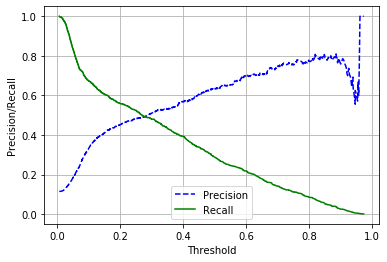

The optimal Threshold is: 0.27910212


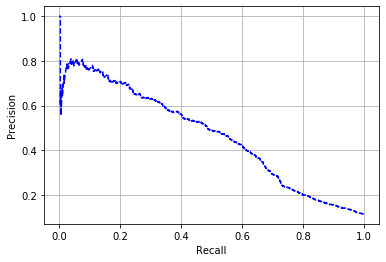

ROC AUC with initial threshold (test) 0.8010344619186398
ROC AUC with optimal F1 threshold (test) 0.7130045561987135
F1 score (macro) with optimal F1 threshold (test) 0.49204545454545456
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.49      0.49      0.49       880

    accuracy                           0.88      7649
   macro avg       0.71      0.71      0.71      7649
weighted avg       0.88      0.88      0.88      7649

           feature  importance
0        euribor3m        1797
5              job        1210
8        education         928
3      day_of_week         861
11        campaign         845
10         housing         493
9          marital         484
6              age         428
4            month         366
17  cons.price.idx         361
14   cons.conf.idx         337
7            pdays         234
1         poutcome         19

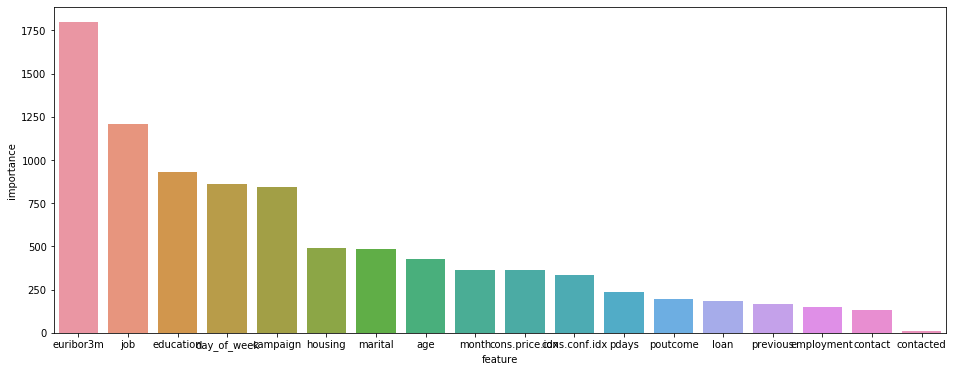

In [115]:
# Looking at the results of the current step of hyperparameter tuning 

# Create the second XGBoost model
xgb_2 = XGBClassifier(
learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
objective = 'binary:logistic',
scale_pos_weight = 1)

# Call the predefined method
xgboost_fit(xgb_2, df_train_prepared, df_train_label, df_test_prepared, df_test_label, feature_names_joined)


The first tuning step seemed to create some overfitting, which we will try to compensate in the regularization step 5.

In [116]:
# Step 3: Tuning gamma

# Define the search space
param_dict_2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}

# Define the search
grid_search_2 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
objective = 'binary:logistic',
scale_pos_weight = 1), param_grid = param_dict_2, scoring = 'f1', cv = 5)

# Search
grid_search_2.fit(df_train_prepared, df_train_label)

# Showing the results
grid_search_2.best_params_, grid_search_2.best_score_


({'mean_fit_time': array([2.39359856, 2.49871716, 2.28249516, 2.21048789, 2.26693697]),
  'std_fit_time': array([0.16198496, 0.17508876, 0.06160104, 0.05650446, 0.03181507]),
  'mean_score_time': array([0.02652912, 0.03091774, 0.02573228, 0.02453504, 0.02413573]),
  'std_score_time': array([0.00293086, 0.00939886, 0.00291756, 0.00101683, 0.00074689]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.39347604, 0.38006231, 0.39754098, 0.36760125, 0.3774359 ]),
  'split1_test_score': array([0.3433923 , 0.35036496, 0.33403361, 0.35220126, 0.34475597]),
  'split2_test_score': array([0.36747624, 0.37775446, 0.36958817, 0.37184874, 0.36903499]),
  'split3_test_score': array([0.36836837, 0.37810945, 0.3722334 , 0.37014925, 0.37088734]),

Evaluation report: 

ROC AUC score (train): 0.8887307971629717
ROC AUC score (test): 0.8006125854497105
F1 score (train): 0.5306454897169619
F1 score (test): 0.4046511627906977
Accuracy (train): 0.9246633546868872
Accuracy (test): 0.8995947182638253
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6769
           1       0.64      0.30      0.40       880

    accuracy                           0.90      7649
   macro avg       0.78      0.64      0.67      7649
weighted avg       0.88      0.90      0.88      7649



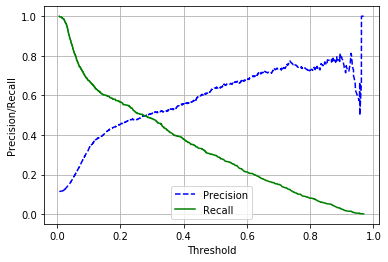

The optimal Threshold is: 0.2760275


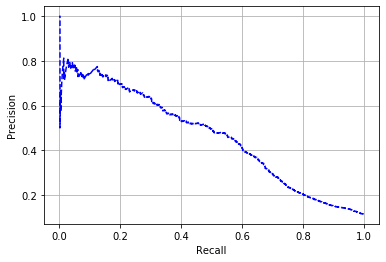

ROC AUC with initial threshold (test) 0.8006125854497105
ROC AUC with optimal F1 threshold (test) 0.7162147960622625
F1 score (macro) with optimal F1 threshold (test) 0.49772727272727274
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.50      0.50      0.50       880

    accuracy                           0.88      7649
   macro avg       0.72      0.72      0.72      7649
weighted avg       0.88      0.88      0.88      7649

           feature  importance
0        euribor3m        1732
5              job        1202
8        education         935
3      day_of_week         877
11        campaign         815
9          marital         496
10         housing         454
6              age         418
4            month         369
17  cons.price.idx         343
14   cons.conf.idx         306
7            pdays         246
1         poutcome         19

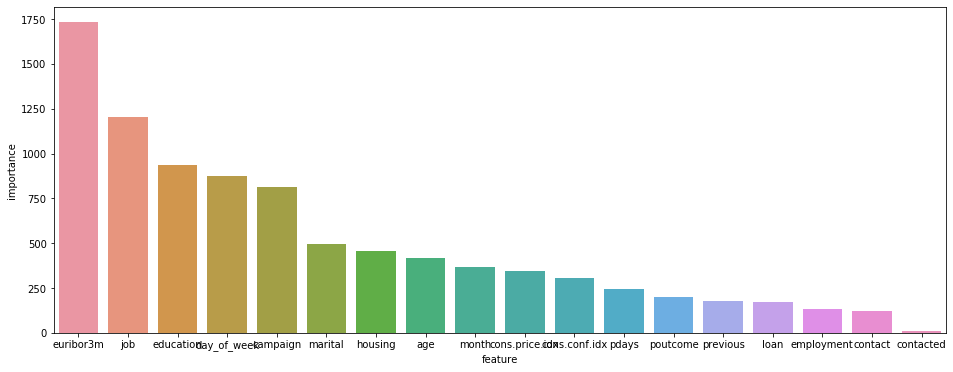

In [117]:
# Looking at the results of the current step of hyperparameter tuning 

# Create the third XGBoost model
xgb_3 = XGBClassifier(
learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.8,
colsample_bytree = 0.8,
objective = 'binary:logistic',
scale_pos_weight = 1)

# Call the predefined method
xgboost_fit(xgb_3, df_train_prepared, df_train_label, df_test_prepared, df_test_label, feature_names_joined)


The overfitting did not increasse too much, but the F1 score (macro avg) 0.72 and (macro) 0.5 even increased again.

In [118]:
# Step 4: Tuning subsample and colsample_bytree

# Define the search space
param_dict_3 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

# Define the search
grid_search_3 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.8,
colsample_bytree = 0.8,
objective = 'binary:logistic',
scale_pos_weight = 1), param_grid = param_dict_3, scoring = 'f1', cv = 5)

# Search
grid_search_3.fit(df_train_prepared, df_train_label)

# Showing the results
grid_search_3.best_params_, grid_search_3.best_score_


({'colsample_bytree': 0.9, 'subsample': 0.9}, 0.3778678196672236)

Evaluation report: 

ROC AUC score (train): 0.8498340983122434
ROC AUC score (test): 0.8076785546408091
F1 score (train): 0.4749738219895288
F1 score (test): 0.3778135048231512
Accuracy (train): 0.918061184468558
Accuracy (test): 0.8988103020002615
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6769
           1       0.65      0.27      0.38       880

    accuracy                           0.90      7649
   macro avg       0.78      0.62      0.66      7649
weighted avg       0.88      0.90      0.88      7649



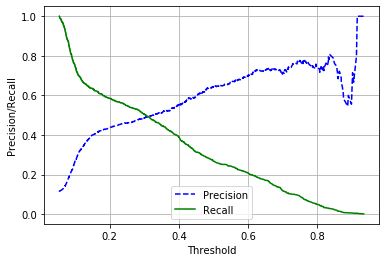

The optimal Threshold is: 0.31140238


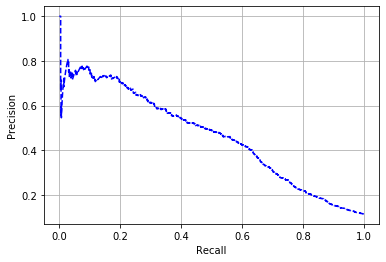

ROC AUC with initial threshold (test) 0.8076785546408091
ROC AUC with optimal F1 threshold (test) 0.7136466041714231
F1 score (macro) with optimal F1 threshold (test) 0.49318181818181817
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.49      0.49      0.49       880

    accuracy                           0.88      7649
   macro avg       0.71      0.71      0.71      7649
weighted avg       0.88      0.88      0.88      7649

           feature  importance
1        euribor3m         860
9              job         537
5        education         408
8      day_of_week         408
3         campaign         351
4              age         207
11         marital         201
6            month         187
10         housing         161
16  cons.price.idx         141
12        poutcome         127
2            pdays         126
15   cons.conf.idx         12

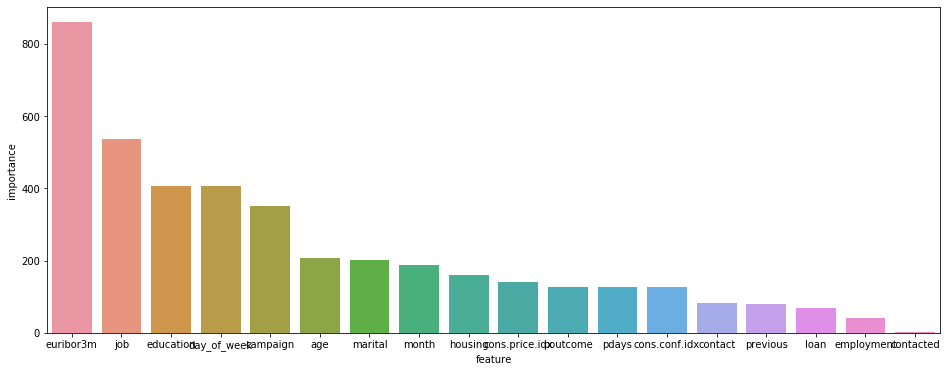

In [119]:
# Looking at the results of the current step of hyperparameter tuning 

# Create the fourth XGBoost model
xgb_4 = XGBClassifier(
learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.9,
colsample_bytree = 0.9,
objective = 'binary:logistic',
scale_pos_weight = 1)

# Call the predefined method
xgboost_fit(xgb_4, df_train_prepared, df_train_label, df_test_prepared, df_test_label, feature_names_joined)


The results tend to overfit again, which in the next step will be countered by regularization.

In [120]:
# Step 5: Regularization

# Define the search space
param_dict_4 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

# Define the search
grid_search_4 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.9,
colsample_bytree = 0.9,
objective = 'binary:logistic',
scale_pos_weight = 1), param_grid = param_dict_4, scoring = 'f1', cv = 5)

# Search
grid_search_4.fit(df_train_prepared, df_train_label)

# Showing the results
grid_search_4.best_params_, grid_search_4.best_score_


({'reg_alpha': 0.01}, 0.3788362216928536)

Evaluation report: 

ROC AUC score (train): 0.8468192489289272
ROC AUC score (test): 0.8085385077693764
F1 score (train): 0.46918238993710687
F1 score (test): 0.38362760834670945
Accuracy (train): 0.9172440841940123
Accuracy (test): 0.8995947182638253
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6769
           1       0.65      0.27      0.38       880

    accuracy                           0.90      7649
   macro avg       0.78      0.63      0.66      7649
weighted avg       0.88      0.90      0.88      7649



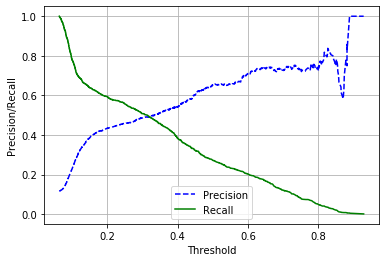

The optimal Threshold is: 0.32089356


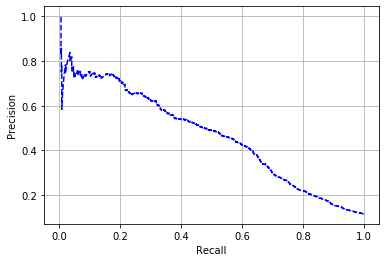

ROC AUC with initial threshold (test) 0.8085385077693764
ROC AUC with optimal F1 threshold (test) 0.7123625082260036
F1 score (macro) with optimal F1 threshold (test) 0.4909090909090909
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.49      0.49      0.49       880

    accuracy                           0.88      7649
   macro avg       0.71      0.71      0.71      7649
weighted avg       0.88      0.88      0.88      7649

           feature  importance
1        euribor3m         829
9              job         498
8      day_of_week         380
5        education         371
3         campaign         324
11         marital         189
4              age         187
6            month         152
10         housing         144
16  cons.price.idx         140
12        poutcome         114
2            pdays         108
15   cons.conf.idx         107

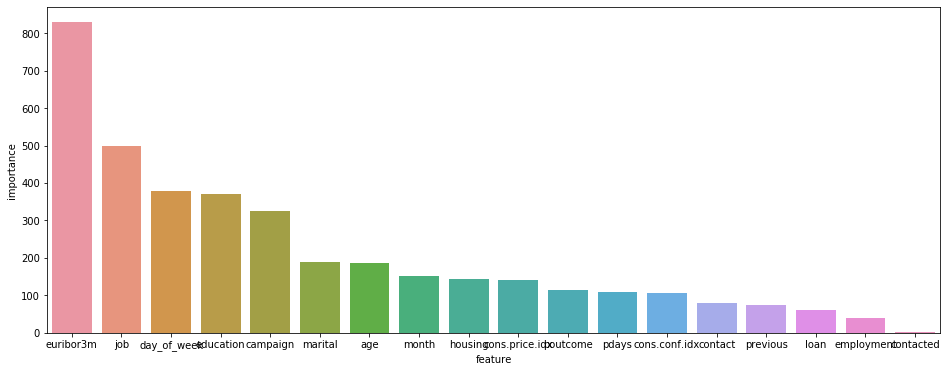

In [121]:
# Looking at the results of the current step of hyperparameter tuning 

# Create the fifth XGBoost model
xgb_5 = XGBClassifier(
learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.9,
colsample_bytree = 0.9,
reg_alpha = 0.01,
objective = 'binary:logistic',
scale_pos_weight = 1)

# Call the predefined method
xgboost_fit(xgb_5, df_train_prepared, df_train_label, df_test_prepared, df_test_label, feature_names_joined)


The regularization did not change to much regarding the scores. Finally I will tune the learning rate.

In [125]:
# Step 6: Learning Rate

# Define the search space
param_dict_5 = {
    'learning_rate':[0.02, 0.04, 0.06, 0.08, 0.1]
}

# Define the search
grid_search_5 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.9,
colsample_bytree = 0.9,
reg_alpha = 0.1,                                                      
objective = 'binary:logistic',
scale_pos_weight = 1), param_grid = param_dict_5, scoring = 'f1', cv = 5)

# Search
grid_search_5.fit(df_train_prepared, df_train_label)

# Showing the results
grid_search_5.best_params_, grid_search_5.best_score_


({'learning_rate': 0.08}, 0.3744631345174091)

Evaluation report: 

ROC AUC score (train): 0.8347795920150185
ROC AUC score (test): 0.809460155924737
F1 score (train): 0.4617640896710664
F1 score (test): 0.38171611868484356
Accuracy (train): 0.9160347757876847
Accuracy (test): 0.8992025101320434
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6769
           1       0.65      0.27      0.38       880

    accuracy                           0.90      7649
   macro avg       0.78      0.63      0.66      7649
weighted avg       0.88      0.90      0.88      7649



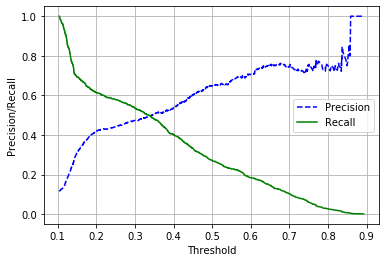

The optimal Threshold is: 0.33993205


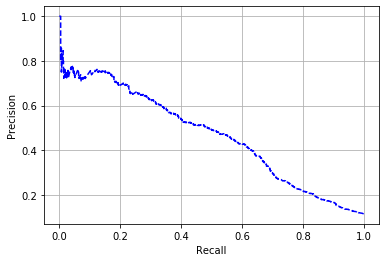

ROC AUC with initial threshold (test) 0.809460155924737
ROC AUC with optimal F1 threshold (test) 0.7155727480895526
F1 score (macro) with optimal F1 threshold (test) 0.4965909090909091
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.50      0.50      0.50       880

    accuracy                           0.88      7649
   macro avg       0.72      0.72      0.72      7649
weighted avg       0.88      0.88      0.88      7649

           feature  importance
1        euribor3m         731
9              job         412
8      day_of_week         358
5        education         323
3         campaign         262
4              age         179
11         marital         170
6            month         150
10         housing         137
16  cons.price.idx         128
15   cons.conf.idx         112
2            pdays         108
12        poutcome         101


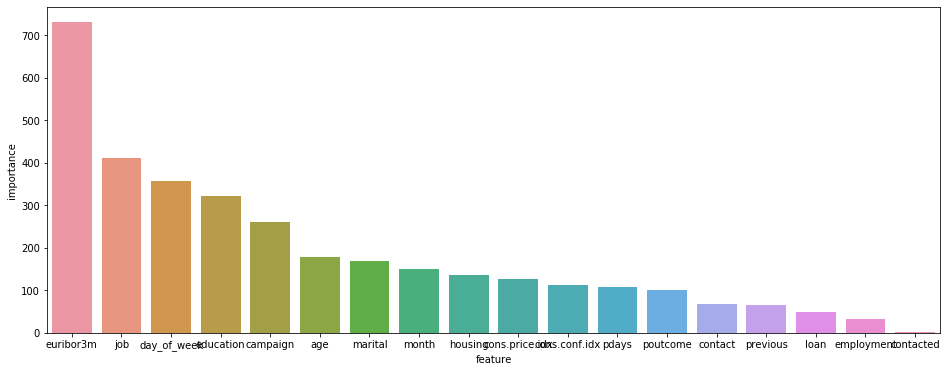

In [126]:
# Looking at the results of the current step of hyperparameter tuning 

# Create the sixth XGBoost model
xgb_6 = XGBClassifier(
learning_rate = 0.08,
n_estimators = 69,
max_depth = 9,
min_child_weight = 3,
gamma = 0.1,
subsample = 0.9,
colsample_bytree = 0.9,
reg_alpha = 0.01,
objective = 'binary:logistic',
scale_pos_weight = 1)

# Call the predefined method
xgboost_fit(xgb_6, df_train_prepared, df_train_label, df_test_prepared, df_test_label, feature_names_joined)


The last model xgb_6 has the best scores on the test set (optimized for F1 score): 
1. F1 score 0.4965
2. F1 score (macro avg.) 0.72
3. F1 score (weighted avg.) 0.88
4. Accuracy 0.88

As we saw during the hyperparameter tuning, the feature importances of various features are quite low. As a radical step the intuitiv idea is to exlude all features from a new model except: "euribor3m", "job", "day_of_week", "education", "campaign". Lets see what happens to the model results when doing so.

In [134]:
# Dropping the features
df_train_dropped = df_train_features.drop(columns=['age', 'marital', 'month', 'housing', 'cons.price.idx', 
                                         'cons.conf.idx', 'pdays', 'poutcome', 'contact', 'previous', 'loan',
                                         'employment', 'contacted'], axis = 1)

df_test_dropped = df_test_features.drop(columns=['age', 'marital', 'month', 'housing', 'cons.price.idx', 
                                         'cons.conf.idx', 'pdays', 'poutcome', 'contact', 'previous', 'loan',
                                         'employment', 'contacted'], axis = 1)

# Change the preparation pipeline accordingly

# Pipeline for ordinal categorical features
cat_pipeline_o_2 = Pipeline([
    ('OrdinalEncoder', OrdinalEncoder(categories=[['blue-collar', 'services', 'entrepreneur', 'technician',
                                  'self-employed', 'management', 'housemaid', 'admin.', 'unemployed','retired','student'], ['basic.9y', 'basic.6y', 'high.school', 'professional.course', 'basic.4y', 'university.degree', 'illiterate']])),
])

# Pipeline for nominal categorical features
cat_pipeline_n_2 = Pipeline([
    ('OrdinalEncoderNominal', OrdinalEncoder()),
])

# Definition of the respective columns
cat_o_2 = ['job', 'education']
cat_n_2 = ['day_of_week']
num_2 = ['campaign', 'euribor3m']

# Creating the final preparation pipeline for RandomForest
prep_pipeline_2 = ColumnTransformer([
    ('cat_o', cat_pipeline_o_2, cat_o_2),
    ('cat_n', cat_pipeline_n_2, cat_n_2),    
    ], remainder = 'passthrough')

Evaluation report: 

ROC AUC score (train): 0.8284300625857032
ROC AUC score (test): 0.7930616178030863
F1 score (train): 0.34431741761936785
F1 score (test): 0.2541630148992112
Accuracy (train): 0.9043992678781541
Accuracy (test): 0.8887436266178586
Classification report - pre optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6769
           1       0.56      0.16      0.25       880

    accuracy                           0.89      7649
   macro avg       0.73      0.57      0.60      7649
weighted avg       0.86      0.89      0.86      7649



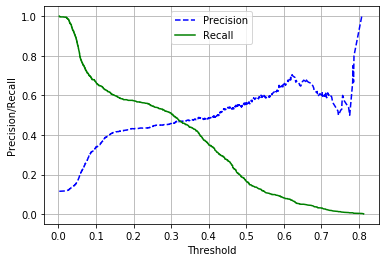

The optimal Threshold is: 0.3239409


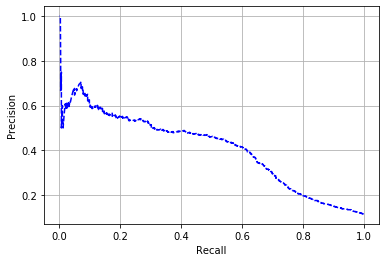

ROC AUC with initial threshold (test) 0.7930616178030863
ROC AUC with optimal F1 threshold (test) 0.700163596744517
F1 score (macro) with optimal F1 threshold (test) 0.4693181818181818
Classification report - after optimal F1 threshold: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.47      0.47      0.47       880

    accuracy                           0.88      7649
   macro avg       0.70      0.70      0.70      7649
weighted avg       0.88      0.88      0.88      7649

       feature  importance
0    euribor3m         442
3     campaign         186
2          job         168
4    education         128
1  day_of_week         127


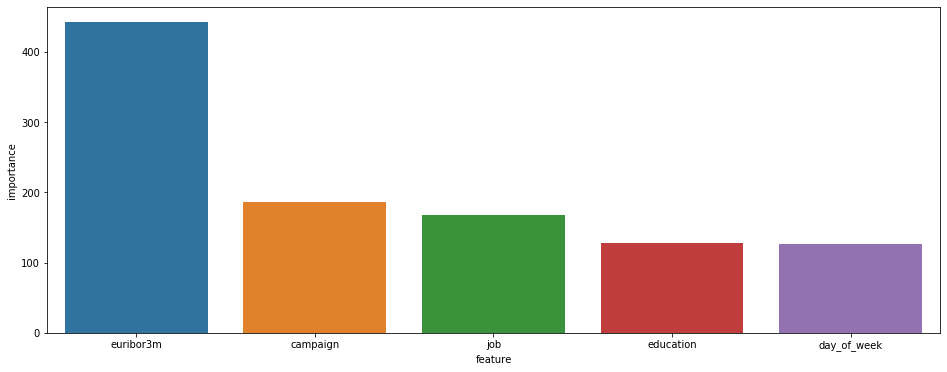

In [137]:
# Data preparation
df_train_prepared_2 = pd.DataFrame(prep_pipeline_2.fit_transform(df_train_dropped))
df_test_prepared_2 = pd.DataFrame(prep_pipeline_2.fit_transform(df_test_dropped))

# New feature names
feature_names_joined_2 = cat_o_2 + cat_n_2 + num_2

# Create a default model
xgb_dropped = XGBClassifier()

# Call the predefined method
xgboost_fit(xgb_dropped, df_train_prepared_2, df_train_label, df_test_prepared_2, df_test_label, feature_names_joined_2)

The F1 scores did not improve by dropping the respective features so the best model is still the fully tuned XGBoost model xgb_6. In general the performance of the XGBoost algorithm is quite good. To compare it to other sophisticated algorithms two types of artificial neural networks (ANN) are created using the sequential as well as the functional API of keras.

# IX. Data preparation pipelines for the ANN based models
Data Pipelines for ANN (keras): Ordinal categorical features (OrdinalEncoder), Nominal categorical features (OneHotEncoder), Numerical features (MinMaxScaler). Due to the decision to drop all "unknown"/NaN values imputation is not included in the pipeline.

In [140]:
# Importing the libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Pipeline for ordinal categorical features
cat_pipeline_o_ann = Pipeline([
    ('OrdinaryEncoder', OrdinalEncoder(categories=[['c','b','a','d','e'],['blue-collar', 'services', 'entrepreneur', 'technician',
                                  'self-employed', 'management', 'housemaid', 'admin.', 'unemployed','retired','student'], ['basic.9y', 'basic.6y', 'high.school', 'professional.course', 'basic.4y', 'university.degree', 'illiterate']])),
    ('Scaler', MinMaxScaler()),
])

# Pipeline for nominal categorical features
cat_pipeline_n_ann = Pipeline([
    ('OHE', OneHotEncoder()),    
])

# Pipeline for numerical features
num_pipeline_ann = Pipeline([
    ('Scaler', MinMaxScaler()),
])

# Definition of the respective columns
cat_ordinal_ann = ['age', 'job', 'education']
cat_nominal_ann = ['marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Separating the numeric categories according to the input side
num_1_ann = ['campaign', 'pdays', 'previous', 'contacted']
num_2_ann = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'employment']

# Creating the final preparation pipeline
prep_pipeline_ann = ColumnTransformer([
    ('cat_o', cat_pipeline_o_ann, cat_ordinal_ann),
    ('cat_n', cat_pipeline_n_ann, cat_nominal_ann),
    ('numeric1', num_pipeline_ann, num_1_ann),
    ('numeric2', num_pipeline_ann, num_2_ann),
], remainder = 'drop')

# XI. ANN with separated fully connected layers using functional Keras API
The first model is built by using the functional API. It consist of two seperated input sides that on the one hand use the input features dealing with the calls and customer specifics (input A) and on the other hand with the economic environment features (input B). After the inputs every respective side consists of multiple fully connected layers which at a given point are concatenated to be followed by multiple fully connected layers until a final output that creates the binary classification.

In [225]:
# Create an ANN with splitted input regarding the economic environment and the campaign details
import tensorflow as tf
from tensorflow import keras

# To create the splitted ANN the funcional keras API is used, which has currently no implementation of hyperparameter tuning

# Definition of the tensorboard directory
import os
root_directory = os.path.join(os.curdir, 'Logs')
def get_run_directory():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_directory, run_id)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_directory())

# Input shape: 
    # input_A: 'job', 'education', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age', 'campaign', 'pdays', 'previous', 'contacted'
    # input_B: 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'employment'

# Input Layer
input_A = keras.layers.Input(shape=[34], name='Input_A')
input_B = keras.layers.Input(shape=[4], name='Input_B')

# Input A side
hidden_A_1 = keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(input_A)
hidden_A_2 = keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(hidden_A_1)
hidden_A_3 = keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(hidden_A_2)
hidden_A_4= keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(hidden_A_3)

# Input B side
hidden_B_1 = keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(input_B)
hidden_B_2 = keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(hidden_B_1)
hidden_B_3 = keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(hidden_B_2)
hidden_B_4= keras.layers.Dense(200, activation = 'elu', kernel_initializer='he_normal')(hidden_B_3)

# Concat the two sides
concat = keras.layers.concatenate([hidden_A_4, hidden_B_4])

# Fully connected layers for the interpretation of the two different input sides
hidden_full_1 = keras.layers.Dense(300, activation = 'elu', kernel_initializer='he_normal')(concat)
hidden_full_2 = keras.layers.Dense(300, activation = 'elu', kernel_initializer='he_normal')(hidden_full_1)
hidden_full_3 = keras.layers.Dense(300, activation = 'elu', kernel_initializer='he_normal')(hidden_full_2)
hidden_full_4 = keras.layers.Dense(300, activation = 'elu', kernel_initializer='he_normal')(hidden_full_3)

# Regularization via Dropout
regularization_1 = keras.layers.Dropout(rate = 0.3)(hidden_full_4)

# Output layer - binary classification
output = keras.layers.Dense(1, activation = 'sigmoid', name='Output')(regularization_1)

# Defining the inputs 
model_split = keras.Model(inputs=[input_A, input_B], outputs=[output])

# Defining the train, test and validation set
X_train, X_valid = train_test_split(df_train)
y_train, y_valid = X_train['y'], X_valid['y']
X_train = X_train.drop(['y'],axis=1)
X_valid = X_valid.drop(['y'],axis=1)

# Defining the learning rate (Exponentail scheduling)
step = 50 * len(X_train) // 32 # stepcount 50 epochs and batchsize 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01,step,0.1)
model_split.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate, momentum=0.9), metrics = ['accuracy','binary_accuracy'])

# Preparing the data
X_train_prepared = pd.DataFrame(prep_pipeline_ann.fit_transform(X_train))
X_input_A = X_train_prepared.iloc[:,:-4]
X_input_B = X_train_prepared.iloc[:,-4:]
X_valid_prepared = pd.DataFrame(prep_pipeline_ann.transform(X_valid))
X_input_A_valid = X_valid_prepared.iloc[:,:-4]
X_input_B_valid = X_valid_prepared.iloc[:,-4:]

# Fitting the model
result_split = model_split.fit((X_input_A, X_input_B), y_train, epochs=50, verbose=0, validation_data=((X_input_A_valid, X_input_B_valid), y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), tensorboard_cb])


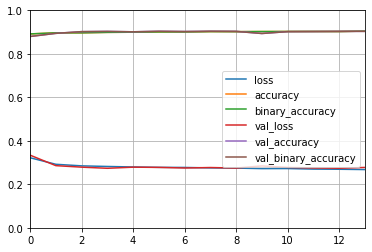

In [151]:
# Looking at the training process
result = pd.DataFrame(result_split.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [153]:
# Evaluate the model ANN with splitted inputs
X_test = df_test
y_test= X_test['y']
X_test_features = X_test.drop(['y'], axis=1)
X_test_prepared = pd.DataFrame(prep_pipeline_ann.transform(X_test_features))
X_input_A_test = X_test_prepared.iloc[:,:-4]
X_input_B_test = X_test_prepared.iloc[:,-4:]
print('\n Accuracy on train data: \n', model_split.evaluate((X_input_A, X_input_B), y_train), '\n')
print('\n Accuracy on test data: \n', model_split.evaluate((X_input_A_test, X_input_B_test), y_test))

22947/22947 [==============================] - 2s 89us/sample - loss: 0.2689 - accuracy: 0.9028 - binary_accuracy: 0.9028

 Accuracy on train data: 
 [0.26889679191075844, 0.9028195, 0.9028195] 

7649/7649 [==============================] - 1s 101us/sample - loss: 0.2794 - accuracy: 0.8982 - binary_accuracy: 0.8982

 Accuracy on test data: 
 [0.2793787559743979, 0.89815664, 0.89815664]


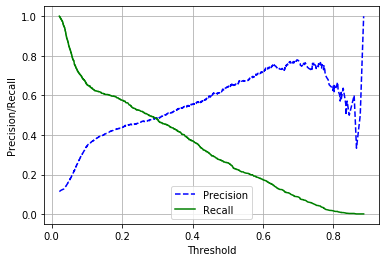

The optimal Threshold is: 0.29496747


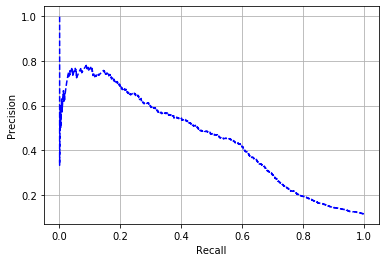

In [154]:
# Create ROC AUC and F1-score metric
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve, f1_score
y_split = model_split.predict((X_input_A_test, X_input_B_test))

# Find the precisions, recalls and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_split)
optimal_threshold = thresholds[np.argmax(precisions==recalls)] # For the maximum F1-Score

plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()
print('The optimal Threshold is:', optimal_threshold)

# Plot Precision directly against recall
plt.plot(recalls, precisions, 'b--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [155]:
# Computing the optimal binary classification
y_split_optimal = (y_split >= optimal_threshold)

# Evaluate the scores of the ANN model
print('ROC AUC with initial threshold', roc_auc_score(y_test, y_split))
print('ROC AUC with optimal F1 threshold', roc_auc_score(y_test, y_split_optimal))
print('F1 score (macro) with optimal F1 threshold', f1_score(y_test, y_split_optimal))
print(classification_report(y_test, y_split_optimal))

ROC AUC with initial threshold 0.7918545776870494
ROC AUC with optimal F1 threshold 0.7091522683624545
F1 score (macro) with optimal F1 threshold 0.48522727272727273
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.49      0.49      0.49       880

    accuracy                           0.88      7649
   macro avg       0.71      0.71      0.71      7649
weighted avg       0.88      0.88      0.88      7649



The ANN with the splitted architecture is not performing better than the tuned XGBoost model xgb_6. The following list shows the comparison of the most important scores (optimized for F1 score):

1. F1 score 0.485 < 0.4965 (xgb_6 best)
2. F1 score (macro avg.) 0.72 < 0.72 (xgb_6 best)
3. F1 score (weighted avg.) 0.88 = 0.88 (xgb_6 best) 
4. Accuracy 0.88 = 0.88 (xgb_6 best)

It is important to note though, that hyperparameter tuning was not possible due to the limits in terms of the functional API of Keras.

# XII. ANN with only fully connected layers using sequential Keras API and KerasTuner
As a next step a simple fully connected ANN is created using the sequential API of Keras. For the tuning of the hyperparameters the still new KerasTuner implementation is used. The variation of parameters for the Tuner are as follows:
1. Number of hidden layers: 6 - 14
2. Number of neurons per hidden layer: 10 - 570, step = 70
3. Activation function between hidden layers: ELU, SELU, ReLU
4. The optimizers: 'adam', 'sgd', 'rmsprop', 'adadelta'

In [228]:
# For the creation of the ANN the sequential Keras API will be used due to possible hyperparameter tuning with Keras-Tuner
from kerastuner.tuners import RandomSearch

# Define the model via the sequential API of Keras
def build_model(hp):
    model_full = keras.models.Sequential()
    model_full.add(keras.layers.Dense(38, activation = 'selu', input_shape=[X_train_prepared.shape[1]]))
    for i in range(hp.Int('num_layers', 6, 14)):
        model_full.add(keras.layers.Dense(units=hp.Int('num_neurons_layer' + str(i),
                                               min_value=10,
                                               max_value=570,
                                               step=70),
                                         activation=hp.Choice('activation', ['elu','selu','relu'])))
    model_full.add(keras.layers.Dropout(rate=0.3))
    model_full.add(keras.layers.Dense(1, activation='sigmoid'))
    model_full.compile(
        optimizer =hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy','binary_accuracy']
        )
    return model_full

# Create the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_fully_connected',
    project_name='bank_marketing_benchmarking_v3')

tuner.search_space_summary()

# Search for the best model
tuner.search(X_train_prepared, y_train, epochs= 40, verbose=0, validation_data=(X_valid_prepared, y_valid), callbacks=[keras.callbacks.EarlyStopping('val_loss', patience =10)])

INFO:tensorflow:Oracle triggered exit


In [229]:
# Evaluate the model
model_full = tuner.get_best_models()[0]
print('\n Accuracy on train data:', model_full.evaluate(X_train_prepared, y_train, verbose=0), '\n')
print('\n Accuracy on test data:',model_full.evaluate(X_test_prepared, y_test, verbose=0))


 Accuracy on train data: [0.28029194154809955, 0.9029503, 0.9029503] 


 Accuracy on test data: [0.28670346847902034, 0.899464, 0.899464]


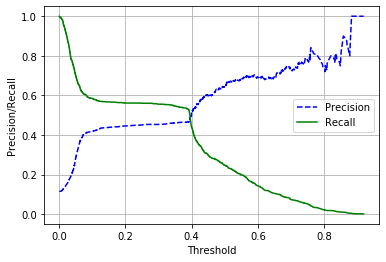

The optimal Threshold is: 0.39569217


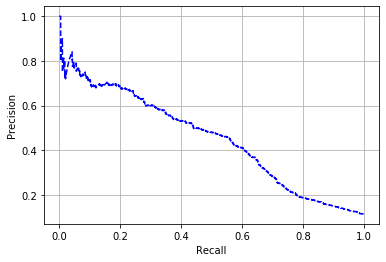

ROC AUC with initial threshold 0.7925775426744921
ROC AUC with optimal F1 threshold 0.7091522683624545
F1 score (macro) with optimal F1 threshold 0.48522727272727273
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6769
           1       0.49      0.49      0.49       880

    accuracy                           0.88      7649
   macro avg       0.71      0.71      0.71      7649
weighted avg       0.88      0.88      0.88      7649



In [172]:
# Find the precisions, recalls and thresholds
y_full = model_full.predict(X_test_prepared)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_full)
optimal_threshold = thresholds[np.argmax(precisions==recalls)] # For the maximum F1-Score

# Plot the PRT-curve
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()
print('The optimal Threshold is:', optimal_threshold)

# Plot Precision directly against recall
plt.plot(recalls, precisions, 'b--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

# Computing the optimal binary classification
y_full_optimal = (y_full >= optimal_threshold)

print('ROC AUC with initial threshold', roc_auc_score(y_test, y_full))
print('ROC AUC with optimal F1 threshold', roc_auc_score(y_test, y_full_optimal))
print('F1 score (macro) with optimal F1 threshold', f1_score(y_test, y_full_optimal))
print(classification_report(y_test, y_full_optimal))

In [173]:
model_full.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 38)                1482      
_________________________________________________________________
dense_1 (Dense)              (None, 220)               8580      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               110500    
_________________________________________________________________
dense_3 (Dense)              (None, 360)               180360    
_________________________________________________________________
dense_4 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_5 (Dense)              (None, 290)               104690    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2

Also the fully connected ANN is not able to have better scores than the fully tuned XGBoost model xgb_6. You can see the differences in the scores in the following (Optimized for F1 score):
   
1. F1 score 0.4852 < 0.4965 (xgb_6 best)
2. F1 score (macro avg.) 0.71 < 0.72 (xgb_6 best)
3. F1 score (weighted avg.) 0.88 = 0.88 (xgb_6 best)
4. Accuracy 0.88 = 0.88 (xgb_6 best)

This concludes this notebook, which had the goal to compare multiple sophisticated algorithms on the UCI Bank Marketing dataset regarding their classification capability. 